# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

- Shape file for road segments: https://wdl-data.fra1.digitaloceanspaces.com/pse/m_risk_prfile.zip
- Excel with explanation of categorical features: https://wdl-data.fra1.digitaloceanspaces.com/pse/Dictionary_Risk_Profiles.xlsx
- OSM map : https://download.bbbike.org/osm/extract/planet_-9.89,38.265_-8.309,39.136.osm.pbf

## Introduction:

**Research**

When it comes to road safety, Portugal has one of the less impressive records in Europe, however, authorities have been taking steps in an attempt to improve the statistics; with fatalities dropping by 40% since 2010. Despite this, more than 400 people lost their lives in 2017 in road accidents and more than 40,000 injured.

Watch out for potholes and oncoming traffic.

Some roads are also poorly lit so driving at night can be especially hazardous

Street signs can be missing, so make sure you have a map or GPS to avoid getting lost

Prepare for the possibility of pedestrians on the road. A lot of streets don't have sidewalks so it's not uncommon to see people walking, sometimes four deep on the road. So take it easy and slow down

If you're traveling through rural areas, you may come across livestock crossing the road. Be cautious when driving around bends and be prepared to stop quickly

Watch your speed when you're driving in Portugal. Police are very vigilant and will issue a fine (payable on the spot) if they catch you driving too fast. There are also fixed and mobile speed cameras

The speed limits in Portugal are signposted in kilometers per hour. The national speed limits are 31 mph (50km/h) in urban areas, 56mph (90km/h) and 74mph (120km/h) on motorways

It's illegal to use the outside lane of a roundabout to travel straight through unless you are exiting the roundabout

The same goes for driving while using a cell phone. It's a finable offense that could leave your wallet up to 600 euros lighter

Dropping litter from the car will cost you 300 euros

Don't drink and drive. The legal limit in Portugal is lower than many other countries - anything over 0.5 mg/ml (0.05) and you could end up with a hefty fine, the loss of your license, or inside a Portuguese jail cell

When it comes to road safety, Portugal has one of the less impressive records in Europe, however, authorities have been taking steps in an attempt to improve the statistics; with fatalities dropping by 40% since 2010. Despite this, more than 400 people lost their lives in 2017 in road accidents and more than 40,000 injured.

That is why creating a model that identifies areas or roads with more considerable risks
will help where to invest in road safety and which actions are needed.

From our analysis, it was possible to conclude that there are, basically, three
environments (Ei) where the pavement properties significantly, yet distinctly,
influence the occurrence of accidents:
1. Rural environment with a heavy presence of urban characteristics
2. Environment characterized by a considerable predominance of intersections in a rural environment
3. Environment with curved segments, high longitudinal gradients and **average speed higher** than the tolerable speed


**European Report on the State of Roads in Portugal:**
Scope of problem
- In Portugal, relatively many moped riders, lorry and truck occupants
died in road accidents compared to the EU average.
- Portugal has a somewhat higher share of male road fatalities than
the EU average.
- Fatalities in built-up areas, during daylight and while raining are overrepresented in Portugal.
- The number of speed tickets per population in Portugal is much lower
than the EU average

## Description of the Project

Following our bootcamps completion in March, Olga, Moritz and I (Nicholas) decided to pursue the World Data League Datathon. For stage 2, we decided to focus on challenge 4, which resolved around finding potential hazards on road segments. Following, Nikolai's workshop with Open Street Maps, we believed we had the tools and motivation to work on an interesting project. We decided to use OSM to find key characteristics that may affect the driving speed of car users. Therefore, we created a new feature called Speed_Diff which equals between the difference between Max_Speed and Average_Velocity (per road segments). 

We then plotted OSM amenities and other characteristics found in the region of Lisbon and Porto such as police stations, traffic lights , pedestrian crossings etc..) that were located on road segments. Our assumption was that when driving there could be certain cues that might impact your behavior. For example, you might be unwilling to accelerate or drive recklessly in front of a police station, speeding camera or even a school. We wanted to find out. 

For computational reasons, we focused on the region of Lisbon and its surroundings. We were able to construct a ML/Classification model that (given various variables) would allow us to predict whether a road is likely to have overspeeding or not. 

We plotted the variables we found most interesting and deployed a heatmap. We hope you enjoy our project ! 

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2

# GENERAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# LOADING DATA
import requests
import os
import shutil
from io import BytesIO
import osmium
import fiona
import json


# GEOSPATIAL DATA
from shapely.geometry import Point, LineString, MultiPoint
from shapely.geometry import shape 


# PLOTTING DATA
from folium import Map, CircleMarker, Vega, Popup, Marker, PolyLine, Icon, Choropleth, LayerControl
from folium.plugins import MarkerCluster, HeatMap, BeautifyIcon
from folium.features import ColorLine, GeoJsonPopup, GeoJsonTooltip
from folium.map import FeatureGroup
import shapely
import matplotlib
from ipywidgets import interact
import seaborn as sns
import branca

# STATS
import math
import stats

# ML
import scipy
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor, XGBClassifier



The first database we are cleaning is a shape file containing segments of road in Porto and Lisbon. 
In the next steps we are preparing the dataset for the future analysis.

### Extracting Data

In [2]:
## testing remote opening of files
# constructor of google download links
dl_construct = 'https://drive.google.com/uc?export=download&id='
# id from share link google drive
file_id = '1m2BpnJ-NXqlqFW8gYnC_fEI2PLTrXz1r'
geo_df = gpd.read_file(f'{dl_construct}{file_id}')
geo_df.shape

(34678, 10)

In [3]:
def first_df(geo):
    df = pd.DataFrame(geo).drop(columns='Link_ID')
    df_ren = df.rename(columns={
                        'Daily_Aver':'Daily_Average_Traffic_Intensity',
                        'Average_Ve':'Average_Velocity_of_Vehicle_Traffic',
                        'Median_of_':'Median_of_velocity_of_Vehicle_Traffic',
                        'First_Quar': 'FirstQuartil_of_velocity_of_Vehicle_Traffic',
                        'Third_Quar': 'ThirdQuartil_of_velocity_of_Vehicle_Traffic'
                    })
    return df_ren
    
df = first_df(geo_df) 

- Now we have a dataset containing the same columns but renamed. 
- We also drop the 'Link_ID' column as contain the unique id of the streat, information already present in linkid column

To have a better understanding on our data and to avoid errors during our analysis we need to investigate it with general statistics

### Remove outliers: 

In [4]:
df.describe()

linkid  Daily_Average_Traffic_Intensity  \
count  3.467800e+04                     34678.000000   
mean   8.958206e+08                      3340.417942   
std    2.355910e+08                      2725.873982   
min    8.021682e+07                        14.435864   
25%    7.364832e+08                      1903.398108   
50%    9.067377e+08                      2644.529317   
75%    1.154997e+09                      3897.886608   
max    1.223731e+09                     49309.806935   

       Average_Velocity_of_Vehicle_Traffic  \
count                         34678.000000   
mean                             56.816834   
std                              51.983670   
min                            -401.703724   
25%                              38.315321   
50%                              49.966126   
75%                              69.511585   
max                            6357.022296   

       Median_of_velocity_of_Vehicle_Traffic  \
count                           34678.000000   
mean                               56.463409   
std                                26.240876   
min                                 1.000000   
25%                                38.250000   
50%                                50.000000   
75%                                71.000000   
max                              1326.250000   

       FirstQuartil_of_velocity_of_Vehicle_Traffic  \
count                                 34678.000000   
mean                                     43.822041   
std                                      24.442204   
min                                    -392.500000   
25%                                      26.000000   
50%                                      38.875000   
75%                                      56.000000   
max                                     143.000000   

       ThirdQuartil_of_velocity_of_Vehicle_Traffic    Func_Class     Speed_Cat  
count                                 34678.000000  34678.000000  34678.000000  
mean                                     68.091844      2.684613      4.904781  
std                                      30.985191      0.538658      1.520568  
min                                       1.000000      1.000000      2.000000  
25%                                      48.000000      2.000000      4.000000  
50%                                      60.333333      3.000000      6.000000  
75%                                      85.000000      3.000000      6.000000  
max                                    2605.000000      3.000000      7.000000

- Regarding the columns we know that they report values in km/h: many of the min and max we can observe thank to describe function don't make sense. 
- We need to operate on them as they are **outliers**

In [5]:
def rm_out(df):
    for i in df.columns.drop(['linkid', 'Daily_Average_Traffic_Intensity','geometry']):
        lb = 0
        ub = 180
#         print(lb, ub)
        df[i] = df[i].mask(df[i] < lb) 
        df[i] = df[i].mask(df[i] > ub) 
    return df

data = rm_out(df)

**If we run describe again we will see that the data regarding velocity has just feasible values.**

In [6]:
data.describe()

linkid  Daily_Average_Traffic_Intensity  \
count  3.467800e+04                     34678.000000   
mean   8.958206e+08                      3340.417942   
std    2.355910e+08                      2725.873982   
min    8.021682e+07                        14.435864   
25%    7.364832e+08                      1903.398108   
50%    9.067377e+08                      2644.529317   
75%    1.154997e+09                      3897.886608   
max    1.223731e+09                     49309.806935   

       Average_Velocity_of_Vehicle_Traffic  \
count                         34633.000000   
mean                             56.112805   
std                              24.346245   
min                               1.000000   
25%                              38.317003   
50%                              49.961538   
75%                              69.447459   
max                             179.691892   

       Median_of_velocity_of_Vehicle_Traffic  \
count                           34675.000000   
mean                               56.402803   
std                                25.054113   
min                                 1.000000   
25%                                38.250000   
50%                                50.000000   
75%                                71.000000   
max                               143.250000   

       FirstQuartil_of_velocity_of_Vehicle_Traffic  \
count                                 34677.000000   
mean                                     43.834624   
std                                      24.329987   
min                                       0.000000   
25%                                      26.000000   
50%                                      38.875000   
75%                                      56.000000   
max                                     143.000000   

       ThirdQuartil_of_velocity_of_Vehicle_Traffic    Func_Class     Speed_Cat  
count                                 34674.000000  34678.000000  34678.000000  
mean                                     67.959767      2.684613      4.904781  
std                                      26.706718      0.538658      1.520568  
min                                       1.000000      1.000000      2.000000  
25%                                      48.000000      2.000000      4.000000  
50%                                      60.333333      3.000000      6.000000  
75%                                      85.000000      3.000000      6.000000  
max                                     164.000000      3.000000      7.000000

### Handling duplicates:

In [7]:
len(data) == len(data.drop_duplicates())

True

There are ***no duplicates*** in our dataset

### Handling missing values:

In [8]:
data.isnull().sum().sort_values(ascending=False) , f'Total of data points : {data.shape[0]}'

(Average_Velocity_of_Vehicle_Traffic            45
 ThirdQuartil_of_velocity_of_Vehicle_Traffic     4
 Median_of_velocity_of_Vehicle_Traffic           3
 FirstQuartil_of_velocity_of_Vehicle_Traffic     1
 linkid                                          0
 Daily_Average_Traffic_Intensity                 0
 Func_Class                                      0
 Speed_Cat                                       0
 geometry                                        0
 dtype: int64,
 'Total of data points : 34678')

As we can see the total highest number of missing values detected for column is 45 on a total number of rows of 34'678.
- The missing value for Average Velocity e the ones in Speed Difference Mean are the same (one column is created from the other one)
- The missing values of other column can be easily deleted

**As we are handling data regarding AVERAGE velocity we can easily substitute the missing values with the mean of the corresponding column**

In [9]:
def handling_missing(data):
    imputer = SimpleImputer()
    data['Average_Velocity_of_Vehicle_Traffic']=imputer.fit_transform(data[['Average_Velocity_of_Vehicle_Traffic']])
    return data.dropna()
data = handling_missing(data)

In [10]:
data.isnull().sum()

linkid                                         0
Daily_Average_Traffic_Intensity                0
Average_Velocity_of_Vehicle_Traffic            0
Median_of_velocity_of_Vehicle_Traffic          0
FirstQuartil_of_velocity_of_Vehicle_Traffic    0
ThirdQuartil_of_velocity_of_Vehicle_Traffic    0
Func_Class                                     0
Speed_Cat                                      0
geometry                                       0
dtype: int64

### Feature creation:

Now looking at our data we need to search for a target that in the next step we will use in our model.
Most common causes of Accidents:
- Over Speeding.
- Drunken Driving.
- Distractions to Driver.
- Red Light Jumping.
- Avoiding Safety Gears like Seat belts and Helmets.
- Non-adherence to lane driving and overtaking in a wrong manner.

The first cause is always the **over-speed** that can be connected with one of the above causes. 
For this reason we decide to investigate and use as target information regarding the velocity.

- Speed_Cat (described in the excel above)
- Average Velocity of Vehicle Traffic 
- Median of velocity of Vehicle Traffic

We will create a dictionary that, from the information contained in the excel can describe the type of street regarding the max velocity allowed in there. 


In [11]:
# constructor of google download links
dl_construct = 'https://drive.google.com/uc?export=download&id='
file_id1 = '1QNDc13tYb4PozhmxGv0iXHdjrnCyI7hy'
excel = requests.get(f'{dl_construct}{file_id1}').content
memory = BytesIO(excel)
speed_explanation = pd.read_excel(memory, sheet_name='SpeedCat')
speed_explanation

Speed Cat Speed range in km/h
0          1           >130 km/h
1          2        101-130 km/h
2          3         91-100 km/h
3          4          71-90 km/h
4          5          51-70 km/h
5          6          31-50 km/h
6          7          11-30 km/h
7          8            <11 km/h

 from the table above we can create a dictionary.
1. count values for category
2. translate the speed range in actual number

In [12]:
data.Speed_Cat.value_counts()

6    20307
4     5273
2     5123
3     1843
5     1770
7      357
Name: Speed_Cat, dtype: int64

**NO need of mapping for label 1 and 8**

In [13]:
max_speed_dict = {2:130,3:100,4:90,5:70,6:50,7:30}

In [14]:
def target_creation(data):
    data['Max_speed'] = data['Speed_Cat'].map(max_speed_dict)
    data['Speed_Diff_Mean'] = data['Max_speed'] - data['Average_Velocity_of_Vehicle_Traffic']
    data['Speed_Diff_Median'] = data['Max_speed'] - data['Median_of_velocity_of_Vehicle_Traffic']
    return data
data = target_creation(data)

<ipython-input-14-63521103fb59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Max_speed'] = data['Speed_Cat'].map(max_speed_dict)
<ipython-input-14-63521103fb59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Speed_Diff_Mean'] = data['Max_speed'] - data['Average_Velocity_of_Vehicle_Traffic']
<ipython-input-14-63521103fb59>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [15]:
data[['Speed_Cat','Max_speed', 'Speed_Diff_Mean','Speed_Diff_Median']].head(10)

Speed_Cat  Max_speed  Speed_Diff_Mean  Speed_Diff_Median
0          6         50         4.791284           5.535714
1          4         90        10.436692           7.250000
2          6         50       -15.955069         -17.333333
3          6         50         2.466089           6.000000
4          6         50        -1.375291          -3.250000
5          6         50        17.667821          18.333333
6          6         50        19.613591          22.937500
7          6         50        26.714286          39.000000
8          6         50         6.476409           4.000000
9          6         50       -11.897045           1.346154

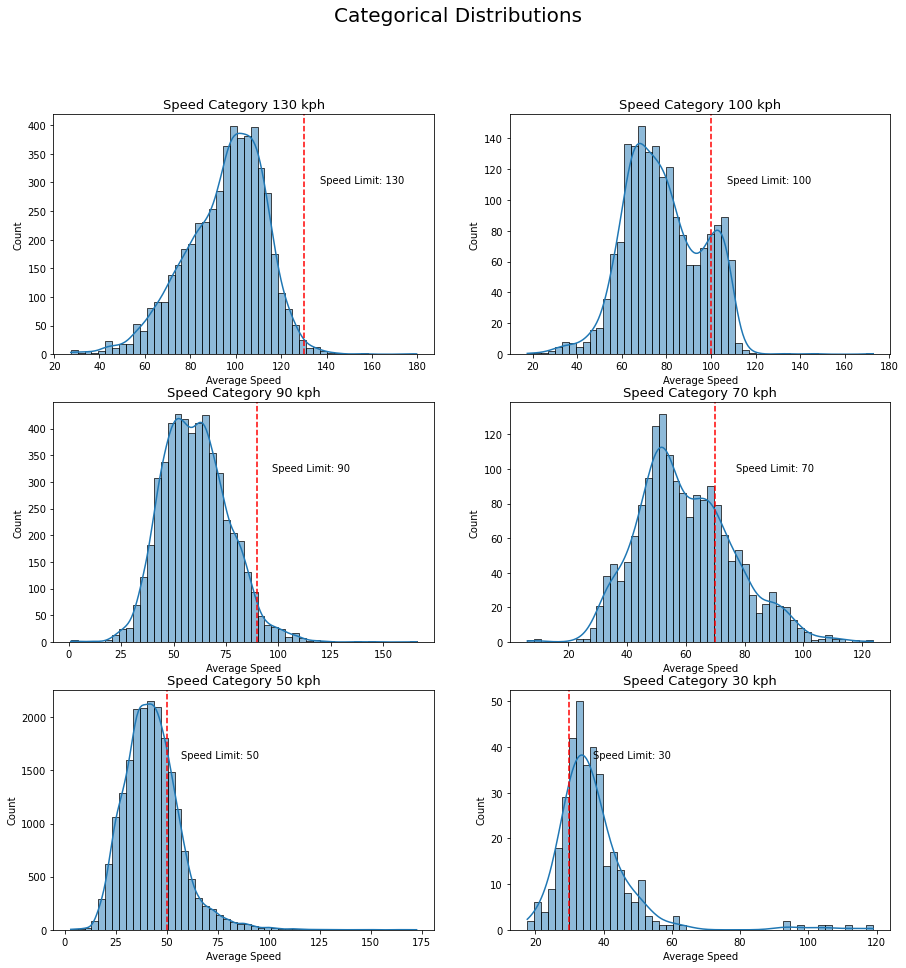

In [16]:
cat_list = {x:data[data['Max_speed']==x] for x in max_speed_dict.values()}
def speed_dist(cat_list):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))
    fig.suptitle('Categorical Distributions', size=20)
#     fig.tight_layout()
    for c, i in enumerate(cat_list.items()):
        speedlim = i[0]
        plt.subplot(3, 2, c+1)
#         plt.set_xlabel('Average Speed')
#         ax = i[1].Average_Velocity_of_Vehicle_Traffic.hist(bins=30)
        ax = sns.histplot(i[1].Average_Velocity_of_Vehicle_Traffic, kde=True, bins=50)
        ylim = i[1].Average_Velocity_of_Vehicle_Traffic.value_counts(bins=50).max()
        ax.set_title(f'Speed Category {i[0]} kph', size=13)
        ax.set_xlabel('Average Speed')
        ax.axvline(speedlim, color='r', linestyle='--')
#         print(f'done {speedlim}, {ylim/2}, {speedlim}')
        ax.text(x=speedlim+7, y=float(ylim-ylim/4), s=f'Speed Limit: {speedlim}')
        
speed_dist(cat_list)

**our first target will be the difference between the mean of velocity and the max speed**

### Scaling features:

We are now ready to scale our dataframe to have a distribution *around* the mean.

1. We need to separate numerical and categorical column
2. We are going to use the Min-Max Scaling method for the numerical ones: is the one that is commonly used distance based algorithms, as k-means that is one of the possible analysis we are taking in consideration.  
3. For the categorical ones we'll use the OneHotEncoding method (for each label in each category creates a different column)

We could also operate this step all together but is important for us to know which column belong to each of the different classes inside the categorical feature. 
**To do so we need to operate for each categorical separately**

In [17]:
def scaling_numerical(data):
    numerical = data.columns.drop(['geometry','linkid','Speed_Cat', 'Func_Class'])
    scaler = MinMaxScaler()
    data_scaled = data.copy()
    for column in numerical:
        scaler.fit(data_scaled[[column]])
        data_scaled[column]=scaler.transform(data_scaled[[column]]) 
    return data_scaled
data_scaled = scaling_numerical(data)

- **BEFORE SCALING:**

In [18]:
data.drop(columns=['geometry','linkid','Speed_Cat', 'Func_Class']).head(1)

Daily_Average_Traffic_Intensity  Average_Velocity_of_Vehicle_Traffic  \
0                      6224.778569                            45.208716   

   Median_of_velocity_of_Vehicle_Traffic  \
0                              44.464286   

   FirstQuartil_of_velocity_of_Vehicle_Traffic  \
0                                         28.0   

   ThirdQuartil_of_velocity_of_Vehicle_Traffic  Max_speed  Speed_Diff_Mean  \
0                                         59.0         50         4.791284   

   Speed_Diff_Median  
0           5.535714

- **AFTER SCALING:**

In [19]:
data_scaled.drop(columns=['geometry','linkid','Speed_Cat', 'Func_Class']).head(1)

Daily_Average_Traffic_Intensity  Average_Velocity_of_Vehicle_Traffic  \
0                         0.125982                             0.247402   

   Median_of_velocity_of_Vehicle_Traffic  \
0                               0.305549   

   FirstQuartil_of_velocity_of_Vehicle_Traffic  \
0                                     0.195804   

   ThirdQuartil_of_velocity_of_Vehicle_Traffic  Max_speed  Speed_Diff_Mean  \
0                                     0.355828        0.2         0.565472   

   Speed_Diff_Median  
0           0.502626

**NOW:** Working with the categorical features the first thing we need to do is to understand the distribution within the labels

In [20]:
data.Func_Class.value_counts() , data.Speed_Cat.value_counts()

(3    25023
 2     8363
 1     1287
 Name: Func_Class, dtype: int64,
 6    20307
 4     5273
 2     5123
 3     1843
 5     1770
 7      357
 Name: Speed_Cat, dtype: int64)

- Functional Class has just 3 possible label for the street that we can understand better looking at the excel

In [21]:
func_explanation = pd.read_excel(memory, sheet_name='Func_Class')
for i,el in enumerate(func_explanation['Description']):
    print(f'Class n.{i+1} : {el} \n')

Class n.1 : These roads are meant for high volume, maximum speed traffic between and through major metropolitan areas. There are very few, if any, speed changes. Access to this road is usually controlled. 

Class n.2 : These roads are used to channel traffic to Main Roads (FRC1) for travel between and through cities in the shortest amount of time. There are very few, if any speed changes. 

Class n.3 : These roads interconnect First Class Roads (FRC2) and provide a high volume of traffic movement at a lower level of mobility than First Class Roads (FRC2). 



With this new and deeper understanding of the distribution and the meaning of the category (*NB: regarding speed_cat we can look back at the point **1.4.7 "Feature creation"** to get these informations)* we can now progress with our transformations.  

In [22]:
def scaling_categorical(data):
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(data[['Func_Class']])
    func_encoded = ohe.transform(data[['Func_Class']])
    data["func_1"],data["func_2"],data['func_3'] = func_encoded.T
    ohe = OneHotEncoder(sparse = False)
    ohe.fit(data[['Speed_Cat']])
    speed_encoded = ohe.transform(data[['Speed_Cat']])
    data["speed_2"],data["speed_3"],data["speed_4"],\
    data["speed_5"], data["speed_6"], data["speed_7"]= speed_encoded.T
    return data 

In [23]:
data_scaled = scaling_categorical(data_scaled)

### Preprocessed Dataframe: 

In [24]:
data_scaled.head()

linkid  Daily_Average_Traffic_Intensity  \
0  80216819                         0.125982   
1  80216858                         0.045067   
2  80216859                         0.043093   
3  80216860                         0.044363   
4  80216867                         0.042360   

   Average_Velocity_of_Vehicle_Traffic  Median_of_velocity_of_Vehicle_Traffic  \
0                             0.247402                               0.305549   
1                             0.439658                               0.574692   
2                             0.363503                               0.466315   
3                             0.260414                               0.302285   
4                             0.281911                               0.367311   

   FirstQuartil_of_velocity_of_Vehicle_Traffic  \
0                                     0.195804   
1                                     0.501748   
2                                     0.426573   
3                                     0.188112   
4                                     0.317016   

   ThirdQuartil_of_velocity_of_Vehicle_Traffic  Func_Class  Speed_Cat  \
0                                     0.355828           2          6   
1                                     0.565951           2          4   
2                                     0.453988           3          6   
3                                     0.447853           3          6   
4                                     0.355828           3          6   

                                            geometry  Max_speed  ...  \
0  MULTILINESTRING ((-9.16402 38.77030, -9.16389 ...        0.2  ...   
1  MULTILINESTRING ((-9.16645 38.74274, -9.16638 ...        0.6  ...   
2  MULTILINESTRING ((-9.16645 38.74274, -9.16637 ...        0.2  ...   
3  MULTILINESTRING ((-9.16588 38.74370, -9.16568 ...        0.2  ...   
4  MULTILINESTRING ((-9.16472 38.74478, -9.16487 ...        0.2  ...   

   Speed_Diff_Median  func_1  func_2  func_3  speed_2  speed_3  speed_4  \
0           0.502626     0.0     1.0     0.0      0.0      0.0      0.0   
1           0.511029     0.0     1.0     0.0      0.0      0.0      1.0   
2           0.390523     0.0     0.0     1.0      0.0      0.0      0.0   
3           0.504902     0.0     0.0     1.0      0.0      0.0      0.0   
4           0.459559     0.0     0.0     1.0      0.0      0.0      0.0   

   speed_5  speed_6  speed_7  
0      0.0      1.0      0.0  
1      0.0      0.0      0.0  
2      0.0      1.0      0.0  
3      0.0      1.0      0.0  
4      0.0      1.0      0.0  

[5 rows x 21 columns]

### Feature engineering

We assume that ***over speeding*** is the main reason for road hazards. Over speeding behavior can be extracted by the deltas between the road's speed category and its actual average speed observations as processed in column ```Speed_Diff_Mean```. <br>

Over speeding can be harnessed among others by the roads environment [Source](https://www.tandfonline.com/doi/abs/10.1080/014416499295420). People chose their speeding behavior not only by speed limits but also by their assessment of the road's quality and the surrounding environment.<br>

Therefore we chose to gather more information about POIs, amenities and public buildings in the surrounding of the provided road segments. Those can be acquired through OSM sources.

1. **Scaling data set to Lisbon**

#########################################################<br>
***_----------FILL WITH EXPLANATION SISTO------------_***<br>
#########################################################

In [25]:
# Transforming pandas df to geopandas df
geo_df = gpd.GeoDataFrame(data_scaled)
geo_df.geometry[0].type

'MultiLineString'

In [26]:
## Filtering only lisbon data inside the circle of 38.72526068747401, -9.142352617846093 with buffer '1'
circle_lisbon = Point(-9.142352617846093, 38.72526068747401).buffer(1)
geo_lis = geo_df[geo_df.geometry.within(circle_lisbon)]
# no immediate usage of this pd.DataFrame
df_lis = pd.DataFrame(geo_lis).drop(columns=['geometry', 'linkid'])

In [27]:
print(f'The new data set has {df_lis.shape[0]} rows as opposed to the original set with {geo_df.shape[0]} rows')

The new data set has 17688 rows as opposed to the original set with 34673 rows


### Loading OSM Maps

In [28]:
%%bash
wget https://download.bbbike.org/osm/extract/planet_-9.89,38.265_-8.309,39.136.osm.pbf \
    --quiet -O Lisbon.osm.pbf

In [29]:
!ogrinfo Lisbon.osm.pbf

INFO: Open of `Lisbon.osm.pbf'
      using driver `OSM' successful.
1: points (Point)
2: lines (Line String)
3: multilinestrings (Multi Line String)
4: multipolygons (Multi Polygon)
5: other_relations (Geometry Collection)


In [30]:
%%bash
ogr2ogr -f "GPKG" \
     lisbon_polygons.gpkg \
     Lisbon.osm.pbf \
    -nlt POLYGONS \
    -nln polygons

0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: A geometry of type POINT is inserted into layer polygons of geometry type POLYGON, which is not normally allowed by the GeoPackage specification, but the driver will however do it. To create a conformant GeoPackage, if using ogr2ogr, the -nlt option can be used to override the layer geometry type. This warning will no longer be emitted for this combination of layer and feature geometry type.
Warning 1: A geometry of type LINESTRING is inserted into layer polygons of geometry type POLYGON, which is not normally allowed by the GeoPackage specification, but the driver will however do it. To create a conformant GeoPackage, if using ogr2ogr, the -nlt option can be used to override the layer geometry type. This warning will no longer be emitted for this combination of layer and feature geometry type.
Warning 1: A geometry of type MULTILINESTRING is inserted into layer polygons of geometry type POLYGON, which is not normally allowed by the GeoPackage specification, but the driver w

In [31]:
#Read data
# about 3 mins
layer_file = "lisbon_polygons.gpkg"
collection = list(fiona.open(layer_file,'r'))
df1 = pd.DataFrame(collection)

#Check Geometry
def isvalid(geom):
    try:
        shape(geom)
        return 1
    except:
        return 0

df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
df1 = df1[df1['isvalid'] == 1]
collection = json.loads(df1.to_json(orient='records'))

#Convert to geodataframe
gdf_lis_poly = gpd.GeoDataFrame.from_features(collection)

In [32]:
gdf_lis_poly

geometry    osm_id           name amenity barrier  \
0       POINT (-9.39964 38.95586)  20629108  Lapa da Serra    None    None   
1       POINT (-9.41390 38.96183)  20629118           None    None    None   
2       POINT (-9.18832 38.74858)  21272086           None    None    None   
3       POINT (-9.45296 38.75312)  21404046           None    None    None   
4       POINT (-9.45655 38.75241)  21404049           None    None    None   
...                           ...       ...            ...     ...     ...   
719586   GEOMETRYCOLLECTION EMPTY  12589376           None    None    None   
719587   GEOMETRYCOLLECTION EMPTY  12589451           None    None    None   
719588   GEOMETRYCOLLECTION EMPTY  12589452           None    None    None   
719589   GEOMETRYCOLLECTION EMPTY  12589453           None    None    None   
719590   GEOMETRYCOLLECTION EMPTY  12589454           None    None    None   

         highway   ref address is_in          place  ... historic land_area  \
0           None  None    None  None  neighbourhood  ...     None      None   
1       crossing  None    None  None           None  ...     None      None   
2       crossing  None    None  None           None  ...     None      None   
3       bus_stop  None    None  None           None  ...     None      None   
4       bus_stop  None    None  None           None  ...     None      None   
...          ...   ...     ...   ...            ...  ...      ...       ...   
719586      None  None    None  None           None  ...     None      None   
719587      None  None    None  None           None  ...     None      None   
719588      None  None    None  None           None  ...     None      None   
719589      None  None    None  None           None  ...     None      None   
719590      None  None    None  None           None  ...     None      None   

       landuse leisure  military natural office  shop sport tourism  
0         None    None      None    None   None  None  None    None  
1         None    None      None    None   None  None  None    None  
2         None    None      None    None   None  None  None    None  
3         None    None      None    None   None  None  None    None  
4         None    None      None    None   None  None  None    None  
...        ...     ...       ...     ...    ...   ...   ...     ...  
719586    None    None      None    None   None  None  None    None  
719587    None    None      None    None   None  None  None    None  
719588    None    None      None    None   None  None  None    None  
719589    None    None      None    None   None  None  None    None  
719590    None    None      None    None   None  None  None    None  

[719591 rows x 33 columns]

In [33]:
poi_gdf = gdf_lis_poly.copy()

### Loading POIs from pre-processed OSM file

In [34]:
print(f'The data set of POIs in the Lisbon region has {poi_gdf.shape[0]} individual points which can be merged with our data set.' )

The data set of POIs in the Lisbon region has 719591 individual points which can be merged with our data set.


In [35]:
poi_gdf.geometry.type.value_counts()

Polygon               420945
LineString            195623
Point                  99120
GeometryCollection      3261
MultiLineString          642
dtype: int64

***Note***<br>
For now we will only be focussing on the geometrical points in the OSM data, not on polygons or line strings.

In [36]:
# filtering down to shapely.geometry.Points
gdf_points = poi_gdf[poi_gdf['geometry'].type == 'Point'].reset_index()
gdf_points.columns

Index(['index', 'geometry', 'osm_id', 'name', 'amenity', 'barrier', 'highway',
       'ref', 'address', 'is_in', 'place', 'man_made', 'other_tags',
       'waterway', 'aerialway', 'z_order', 'type', 'osm_way_id', 'aeroway',
       'admin_level', 'boundary', 'building', 'craft', 'geological',
       'historic', 'land_area', 'landuse', 'leisure', 'military', 'natural',
       'office', 'shop', 'sport', 'tourism'],
      dtype='object')

**Note**<br>
The points provided are categorized and stored in many columns. We will shrink this information to one column and fill it with all the important information about the point. <br>
Some points do not provide any information. Those ones will be dropped. 

In [37]:
# reducing geo_df columns, only leaving one valid column
def new_desc(geo):
    geo['desc_points'] = None
    # columns to be taken into consideration
    lst_cols = [  'amenity', 
                  'barrier', 
                  'building', 
                  'highway', 
                  'landuse', 
                  'man_made', 
                  'natural', 
                  'office']
    for c, row in geo.iterrows():
#         concat_name = [f'feat_{i}_{row[i]}' for i in lst_cols if row[i] == row[i]]
        concat_name = [f'feat_{i}_{row[i]}' for i in lst_cols if row[i] != None]
        if len(concat_name) > 0:
            geo.at[c, 'desc_points'] = concat_name[0]
        else: 
            geo.at[c, 'desc_points'] = None
        print(f'done: {c}')
        
    
    geo = geo[['geometry', 'desc_points']]
    # drop empty descriptions
    geo = geo.dropna(subset=['desc_points'])
    geo= geo.reset_index(drop=True)
    
    return geo

In [38]:
# applying cleaning function to geo df
gdf_points_clean = new_desc(gdf_points)

done: 0
done: 1
done: 2
done: 3
done: 4
done: 5
done: 6
done: 7
done: 8
done: 9
done: 10
done: 11
done: 12
done: 13
done: 14
done: 15
done: 16
done: 17
done: 18
done: 19
done: 20
done: 21
done: 22
done: 23
done: 24
done: 25
done: 26
done: 27
done: 28
done: 29
done: 30
done: 31
done: 32
done: 33
done: 34
done: 35
done: 36
done: 37
done: 38
done: 39
done: 40
done: 41
done: 42
done: 43
done: 44
done: 45
done: 46
done: 47
done: 48
done: 49
done: 50
done: 51
done: 52
done: 53
done: 54
done: 55
done: 56
done: 57
done: 58
done: 59
done: 60
done: 61
done: 62
done: 63
done: 64
done: 65
done: 66
done: 67
done: 68
done: 69
done: 70
done: 71
done: 72
done: 73
done: 74
done: 75
done: 76
done: 77
done: 78
done: 79
done: 80
done: 81
done: 82
done: 83
done: 84
done: 85
done: 86
done: 87
done: 88
done: 89
done: 90
done: 91
done: 92
done: 93
done: 94
done: 95
done: 96
done: 97
done: 98
done: 99
done: 100
done: 101
done: 102
done: 103
done: 104
done: 105
done: 106
done: 107
done: 108
done: 109
done: 110


done: 1218
done: 1219
done: 1220
done: 1221
done: 1222
done: 1223
done: 1224
done: 1225
done: 1226
done: 1227
done: 1228
done: 1229
done: 1230
done: 1231
done: 1232
done: 1233
done: 1234
done: 1235
done: 1236
done: 1237
done: 1238
done: 1239
done: 1240
done: 1241
done: 1242
done: 1243
done: 1244
done: 1245
done: 1246
done: 1247
done: 1248
done: 1249
done: 1250
done: 1251
done: 1252
done: 1253
done: 1254
done: 1255
done: 1256
done: 1257
done: 1258
done: 1259
done: 1260
done: 1261
done: 1262
done: 1263
done: 1264
done: 1265
done: 1266
done: 1267
done: 1268
done: 1269
done: 1270
done: 1271
done: 1272
done: 1273
done: 1274
done: 1275
done: 1276
done: 1277
done: 1278
done: 1279
done: 1280
done: 1281
done: 1282
done: 1283
done: 1284
done: 1285
done: 1286
done: 1287
done: 1288
done: 1289
done: 1290
done: 1291
done: 1292
done: 1293
done: 1294
done: 1295
done: 1296
done: 1297
done: 1298
done: 1299
done: 1300
done: 1301
done: 1302
done: 1303
done: 1304
done: 1305
done: 1306
done: 1307
done: 1308

done: 2073
done: 2074
done: 2075
done: 2076
done: 2077
done: 2078
done: 2079
done: 2080
done: 2081
done: 2082
done: 2083
done: 2084
done: 2085
done: 2086
done: 2087
done: 2088
done: 2089
done: 2090
done: 2091
done: 2092
done: 2093
done: 2094
done: 2095
done: 2096
done: 2097
done: 2098
done: 2099
done: 2100
done: 2101
done: 2102
done: 2103
done: 2104
done: 2105
done: 2106
done: 2107
done: 2108
done: 2109
done: 2110
done: 2111
done: 2112
done: 2113
done: 2114
done: 2115
done: 2116
done: 2117
done: 2118
done: 2119
done: 2120
done: 2121
done: 2122
done: 2123
done: 2124
done: 2125
done: 2126
done: 2127
done: 2128
done: 2129
done: 2130
done: 2131
done: 2132
done: 2133
done: 2134
done: 2135
done: 2136
done: 2137
done: 2138
done: 2139
done: 2140
done: 2141
done: 2142
done: 2143
done: 2144
done: 2145
done: 2146
done: 2147
done: 2148
done: 2149
done: 2150
done: 2151
done: 2152
done: 2153
done: 2154
done: 2155
done: 2156
done: 2157
done: 2158
done: 2159
done: 2160
done: 2161
done: 2162
done: 2163

done: 2885
done: 2886
done: 2887
done: 2888
done: 2889
done: 2890
done: 2891
done: 2892
done: 2893
done: 2894
done: 2895
done: 2896
done: 2897
done: 2898
done: 2899
done: 2900
done: 2901
done: 2902
done: 2903
done: 2904
done: 2905
done: 2906
done: 2907
done: 2908
done: 2909
done: 2910
done: 2911
done: 2912
done: 2913
done: 2914
done: 2915
done: 2916
done: 2917
done: 2918
done: 2919
done: 2920
done: 2921
done: 2922
done: 2923
done: 2924
done: 2925
done: 2926
done: 2927
done: 2928
done: 2929
done: 2930
done: 2931
done: 2932
done: 2933
done: 2934
done: 2935
done: 2936
done: 2937
done: 2938
done: 2939
done: 2940
done: 2941
done: 2942
done: 2943
done: 2944
done: 2945
done: 2946
done: 2947
done: 2948
done: 2949
done: 2950
done: 2951
done: 2952
done: 2953
done: 2954
done: 2955
done: 2956
done: 2957
done: 2958
done: 2959
done: 2960
done: 2961
done: 2962
done: 2963
done: 2964
done: 2965
done: 2966
done: 2967
done: 2968
done: 2969
done: 2970
done: 2971
done: 2972
done: 2973
done: 2974
done: 2975

done: 3734
done: 3735
done: 3736
done: 3737
done: 3738
done: 3739
done: 3740
done: 3741
done: 3742
done: 3743
done: 3744
done: 3745
done: 3746
done: 3747
done: 3748
done: 3749
done: 3750
done: 3751
done: 3752
done: 3753
done: 3754
done: 3755
done: 3756
done: 3757
done: 3758
done: 3759
done: 3760
done: 3761
done: 3762
done: 3763
done: 3764
done: 3765
done: 3766
done: 3767
done: 3768
done: 3769
done: 3770
done: 3771
done: 3772
done: 3773
done: 3774
done: 3775
done: 3776
done: 3777
done: 3778
done: 3779
done: 3780
done: 3781
done: 3782
done: 3783
done: 3784
done: 3785
done: 3786
done: 3787
done: 3788
done: 3789
done: 3790
done: 3791
done: 3792
done: 3793
done: 3794
done: 3795
done: 3796
done: 3797
done: 3798
done: 3799
done: 3800
done: 3801
done: 3802
done: 3803
done: 3804
done: 3805
done: 3806
done: 3807
done: 3808
done: 3809
done: 3810
done: 3811
done: 3812
done: 3813
done: 3814
done: 3815
done: 3816
done: 3817
done: 3818
done: 3819
done: 3820
done: 3821
done: 3822
done: 3823
done: 3824

done: 4657
done: 4658
done: 4659
done: 4660
done: 4661
done: 4662
done: 4663
done: 4664
done: 4665
done: 4666
done: 4667
done: 4668
done: 4669
done: 4670
done: 4671
done: 4672
done: 4673
done: 4674
done: 4675
done: 4676
done: 4677
done: 4678
done: 4679
done: 4680
done: 4681
done: 4682
done: 4683
done: 4684
done: 4685
done: 4686
done: 4687
done: 4688
done: 4689
done: 4690
done: 4691
done: 4692
done: 4693
done: 4694
done: 4695
done: 4696
done: 4697
done: 4698
done: 4699
done: 4700
done: 4701
done: 4702
done: 4703
done: 4704
done: 4705
done: 4706
done: 4707
done: 4708
done: 4709
done: 4710
done: 4711
done: 4712
done: 4713
done: 4714
done: 4715
done: 4716
done: 4717
done: 4718
done: 4719
done: 4720
done: 4721
done: 4722
done: 4723
done: 4724
done: 4725
done: 4726
done: 4727
done: 4728
done: 4729
done: 4730
done: 4731
done: 4732
done: 4733
done: 4734
done: 4735
done: 4736
done: 4737
done: 4738
done: 4739
done: 4740
done: 4741
done: 4742
done: 4743
done: 4744
done: 4745
done: 4746
done: 4747

done: 5798
done: 5799
done: 5800
done: 5801
done: 5802
done: 5803
done: 5804
done: 5805
done: 5806
done: 5807
done: 5808
done: 5809
done: 5810
done: 5811
done: 5812
done: 5813
done: 5814
done: 5815
done: 5816
done: 5817
done: 5818
done: 5819
done: 5820
done: 5821
done: 5822
done: 5823
done: 5824
done: 5825
done: 5826
done: 5827
done: 5828
done: 5829
done: 5830
done: 5831
done: 5832
done: 5833
done: 5834
done: 5835
done: 5836
done: 5837
done: 5838
done: 5839
done: 5840
done: 5841
done: 5842
done: 5843
done: 5844
done: 5845
done: 5846
done: 5847
done: 5848
done: 5849
done: 5850
done: 5851
done: 5852
done: 5853
done: 5854
done: 5855
done: 5856
done: 5857
done: 5858
done: 5859
done: 5860
done: 5861
done: 5862
done: 5863
done: 5864
done: 5865
done: 5866
done: 5867
done: 5868
done: 5869
done: 5870
done: 5871
done: 5872
done: 5873
done: 5874
done: 5875
done: 5876
done: 5877
done: 5878
done: 5879
done: 5880
done: 5881
done: 5882
done: 5883
done: 5884
done: 5885
done: 5886
done: 5887
done: 5888

done: 6573
done: 6574
done: 6575
done: 6576
done: 6577
done: 6578
done: 6579
done: 6580
done: 6581
done: 6582
done: 6583
done: 6584
done: 6585
done: 6586
done: 6587
done: 6588
done: 6589
done: 6590
done: 6591
done: 6592
done: 6593
done: 6594
done: 6595
done: 6596
done: 6597
done: 6598
done: 6599
done: 6600
done: 6601
done: 6602
done: 6603
done: 6604
done: 6605
done: 6606
done: 6607
done: 6608
done: 6609
done: 6610
done: 6611
done: 6612
done: 6613
done: 6614
done: 6615
done: 6616
done: 6617
done: 6618
done: 6619
done: 6620
done: 6621
done: 6622
done: 6623
done: 6624
done: 6625
done: 6626
done: 6627
done: 6628
done: 6629
done: 6630
done: 6631
done: 6632
done: 6633
done: 6634
done: 6635
done: 6636
done: 6637
done: 6638
done: 6639
done: 6640
done: 6641
done: 6642
done: 6643
done: 6644
done: 6645
done: 6646
done: 6647
done: 6648
done: 6649
done: 6650
done: 6651
done: 6652
done: 6653
done: 6654
done: 6655
done: 6656
done: 6657
done: 6658
done: 6659
done: 6660
done: 6661
done: 6662
done: 6663

done: 7359
done: 7360
done: 7361
done: 7362
done: 7363
done: 7364
done: 7365
done: 7366
done: 7367
done: 7368
done: 7369
done: 7370
done: 7371
done: 7372
done: 7373
done: 7374
done: 7375
done: 7376
done: 7377
done: 7378
done: 7379
done: 7380
done: 7381
done: 7382
done: 7383
done: 7384
done: 7385
done: 7386
done: 7387
done: 7388
done: 7389
done: 7390
done: 7391
done: 7392
done: 7393
done: 7394
done: 7395
done: 7396
done: 7397
done: 7398
done: 7399
done: 7400
done: 7401
done: 7402
done: 7403
done: 7404
done: 7405
done: 7406
done: 7407
done: 7408
done: 7409
done: 7410
done: 7411
done: 7412
done: 7413
done: 7414
done: 7415
done: 7416
done: 7417
done: 7418
done: 7419
done: 7420
done: 7421
done: 7422
done: 7423
done: 7424
done: 7425
done: 7426
done: 7427
done: 7428
done: 7429
done: 7430
done: 7431
done: 7432
done: 7433
done: 7434
done: 7435
done: 7436
done: 7437
done: 7438
done: 7439
done: 7440
done: 7441
done: 7442
done: 7443
done: 7444
done: 7445
done: 7446
done: 7447
done: 7448
done: 7449

done: 8254
done: 8255
done: 8256
done: 8257
done: 8258
done: 8259
done: 8260
done: 8261
done: 8262
done: 8263
done: 8264
done: 8265
done: 8266
done: 8267
done: 8268
done: 8269
done: 8270
done: 8271
done: 8272
done: 8273
done: 8274
done: 8275
done: 8276
done: 8277
done: 8278
done: 8279
done: 8280
done: 8281
done: 8282
done: 8283
done: 8284
done: 8285
done: 8286
done: 8287
done: 8288
done: 8289
done: 8290
done: 8291
done: 8292
done: 8293
done: 8294
done: 8295
done: 8296
done: 8297
done: 8298
done: 8299
done: 8300
done: 8301
done: 8302
done: 8303
done: 8304
done: 8305
done: 8306
done: 8307
done: 8308
done: 8309
done: 8310
done: 8311
done: 8312
done: 8313
done: 8314
done: 8315
done: 8316
done: 8317
done: 8318
done: 8319
done: 8320
done: 8321
done: 8322
done: 8323
done: 8324
done: 8325
done: 8326
done: 8327
done: 8328
done: 8329
done: 8330
done: 8331
done: 8332
done: 8333
done: 8334
done: 8335
done: 8336
done: 8337
done: 8338
done: 8339
done: 8340
done: 8341
done: 8342
done: 8343
done: 8344

done: 9196
done: 9197
done: 9198
done: 9199
done: 9200
done: 9201
done: 9202
done: 9203
done: 9204
done: 9205
done: 9206
done: 9207
done: 9208
done: 9209
done: 9210
done: 9211
done: 9212
done: 9213
done: 9214
done: 9215
done: 9216
done: 9217
done: 9218
done: 9219
done: 9220
done: 9221
done: 9222
done: 9223
done: 9224
done: 9225
done: 9226
done: 9227
done: 9228
done: 9229
done: 9230
done: 9231
done: 9232
done: 9233
done: 9234
done: 9235
done: 9236
done: 9237
done: 9238
done: 9239
done: 9240
done: 9241
done: 9242
done: 9243
done: 9244
done: 9245
done: 9246
done: 9247
done: 9248
done: 9249
done: 9250
done: 9251
done: 9252
done: 9253
done: 9254
done: 9255
done: 9256
done: 9257
done: 9258
done: 9259
done: 9260
done: 9261
done: 9262
done: 9263
done: 9264
done: 9265
done: 9266
done: 9267
done: 9268
done: 9269
done: 9270
done: 9271
done: 9272
done: 9273
done: 9274
done: 9275
done: 9276
done: 9277
done: 9278
done: 9279
done: 9280
done: 9281
done: 9282
done: 9283
done: 9284
done: 9285
done: 9286

done: 10160
done: 10161
done: 10162
done: 10163
done: 10164
done: 10165
done: 10166
done: 10167
done: 10168
done: 10169
done: 10170
done: 10171
done: 10172
done: 10173
done: 10174
done: 10175
done: 10176
done: 10177
done: 10178
done: 10179
done: 10180
done: 10181
done: 10182
done: 10183
done: 10184
done: 10185
done: 10186
done: 10187
done: 10188
done: 10189
done: 10190
done: 10191
done: 10192
done: 10193
done: 10194
done: 10195
done: 10196
done: 10197
done: 10198
done: 10199
done: 10200
done: 10201
done: 10202
done: 10203
done: 10204
done: 10205
done: 10206
done: 10207
done: 10208
done: 10209
done: 10210
done: 10211
done: 10212
done: 10213
done: 10214
done: 10215
done: 10216
done: 10217
done: 10218
done: 10219
done: 10220
done: 10221
done: 10222
done: 10223
done: 10224
done: 10225
done: 10226
done: 10227
done: 10228
done: 10229
done: 10230
done: 10231
done: 10232
done: 10233
done: 10234
done: 10235
done: 10236
done: 10237
done: 10238
done: 10239
done: 10240
done: 10241
done: 10242
done

done: 11073
done: 11074
done: 11075
done: 11076
done: 11077
done: 11078
done: 11079
done: 11080
done: 11081
done: 11082
done: 11083
done: 11084
done: 11085
done: 11086
done: 11087
done: 11088
done: 11089
done: 11090
done: 11091
done: 11092
done: 11093
done: 11094
done: 11095
done: 11096
done: 11097
done: 11098
done: 11099
done: 11100
done: 11101
done: 11102
done: 11103
done: 11104
done: 11105
done: 11106
done: 11107
done: 11108
done: 11109
done: 11110
done: 11111
done: 11112
done: 11113
done: 11114
done: 11115
done: 11116
done: 11117
done: 11118
done: 11119
done: 11120
done: 11121
done: 11122
done: 11123
done: 11124
done: 11125
done: 11126
done: 11127
done: 11128
done: 11129
done: 11130
done: 11131
done: 11132
done: 11133
done: 11134
done: 11135
done: 11136
done: 11137
done: 11138
done: 11139
done: 11140
done: 11141
done: 11142
done: 11143
done: 11144
done: 11145
done: 11146
done: 11147
done: 11148
done: 11149
done: 11150
done: 11151
done: 11152
done: 11153
done: 11154
done: 11155
done

done: 12600
done: 12601
done: 12602
done: 12603
done: 12604
done: 12605
done: 12606
done: 12607
done: 12608
done: 12609
done: 12610
done: 12611
done: 12612
done: 12613
done: 12614
done: 12615
done: 12616
done: 12617
done: 12618
done: 12619
done: 12620
done: 12621
done: 12622
done: 12623
done: 12624
done: 12625
done: 12626
done: 12627
done: 12628
done: 12629
done: 12630
done: 12631
done: 12632
done: 12633
done: 12634
done: 12635
done: 12636
done: 12637
done: 12638
done: 12639
done: 12640
done: 12641
done: 12642
done: 12643
done: 12644
done: 12645
done: 12646
done: 12647
done: 12648
done: 12649
done: 12650
done: 12651
done: 12652
done: 12653
done: 12654
done: 12655
done: 12656
done: 12657
done: 12658
done: 12659
done: 12660
done: 12661
done: 12662
done: 12663
done: 12664
done: 12665
done: 12666
done: 12667
done: 12668
done: 12669
done: 12670
done: 12671
done: 12672
done: 12673
done: 12674
done: 12675
done: 12676
done: 12677
done: 12678
done: 12679
done: 12680
done: 12681
done: 12682
done

done: 13673
done: 13674
done: 13675
done: 13676
done: 13677
done: 13678
done: 13679
done: 13680
done: 13681
done: 13682
done: 13683
done: 13684
done: 13685
done: 13686
done: 13687
done: 13688
done: 13689
done: 13690
done: 13691
done: 13692
done: 13693
done: 13694
done: 13695
done: 13696
done: 13697
done: 13698
done: 13699
done: 13700
done: 13701
done: 13702
done: 13703
done: 13704
done: 13705
done: 13706
done: 13707
done: 13708
done: 13709
done: 13710
done: 13711
done: 13712
done: 13713
done: 13714
done: 13715
done: 13716
done: 13717
done: 13718
done: 13719
done: 13720
done: 13721
done: 13722
done: 13723
done: 13724
done: 13725
done: 13726
done: 13727
done: 13728
done: 13729
done: 13730
done: 13731
done: 13732
done: 13733
done: 13734
done: 13735
done: 13736
done: 13737
done: 13738
done: 13739
done: 13740
done: 13741
done: 13742
done: 13743
done: 13744
done: 13745
done: 13746
done: 13747
done: 13748
done: 13749
done: 13750
done: 13751
done: 13752
done: 13753
done: 13754
done: 13755
done

done: 14411
done: 14412
done: 14413
done: 14414
done: 14415
done: 14416
done: 14417
done: 14418
done: 14419
done: 14420
done: 14421
done: 14422
done: 14423
done: 14424
done: 14425
done: 14426
done: 14427
done: 14428
done: 14429
done: 14430
done: 14431
done: 14432
done: 14433
done: 14434
done: 14435
done: 14436
done: 14437
done: 14438
done: 14439
done: 14440
done: 14441
done: 14442
done: 14443
done: 14444
done: 14445
done: 14446
done: 14447
done: 14448
done: 14449
done: 14450
done: 14451
done: 14452
done: 14453
done: 14454
done: 14455
done: 14456
done: 14457
done: 14458
done: 14459
done: 14460
done: 14461
done: 14462
done: 14463
done: 14464
done: 14465
done: 14466
done: 14467
done: 14468
done: 14469
done: 14470
done: 14471
done: 14472
done: 14473
done: 14474
done: 14475
done: 14476
done: 14477
done: 14478
done: 14479
done: 14480
done: 14481
done: 14482
done: 14483
done: 14484
done: 14485
done: 14486
done: 14487
done: 14488
done: 14489
done: 14490
done: 14491
done: 14492
done: 14493
done

done: 15159
done: 15160
done: 15161
done: 15162
done: 15163
done: 15164
done: 15165
done: 15166
done: 15167
done: 15168
done: 15169
done: 15170
done: 15171
done: 15172
done: 15173
done: 15174
done: 15175
done: 15176
done: 15177
done: 15178
done: 15179
done: 15180
done: 15181
done: 15182
done: 15183
done: 15184
done: 15185
done: 15186
done: 15187
done: 15188
done: 15189
done: 15190
done: 15191
done: 15192
done: 15193
done: 15194
done: 15195
done: 15196
done: 15197
done: 15198
done: 15199
done: 15200
done: 15201
done: 15202
done: 15203
done: 15204
done: 15205
done: 15206
done: 15207
done: 15208
done: 15209
done: 15210
done: 15211
done: 15212
done: 15213
done: 15214
done: 15215
done: 15216
done: 15217
done: 15218
done: 15219
done: 15220
done: 15221
done: 15222
done: 15223
done: 15224
done: 15225
done: 15226
done: 15227
done: 15228
done: 15229
done: 15230
done: 15231
done: 15232
done: 15233
done: 15234
done: 15235
done: 15236
done: 15237
done: 15238
done: 15239
done: 15240
done: 15241
done

done: 16288
done: 16289
done: 16290
done: 16291
done: 16292
done: 16293
done: 16294
done: 16295
done: 16296
done: 16297
done: 16298
done: 16299
done: 16300
done: 16301
done: 16302
done: 16303
done: 16304
done: 16305
done: 16306
done: 16307
done: 16308
done: 16309
done: 16310
done: 16311
done: 16312
done: 16313
done: 16314
done: 16315
done: 16316
done: 16317
done: 16318
done: 16319
done: 16320
done: 16321
done: 16322
done: 16323
done: 16324
done: 16325
done: 16326
done: 16327
done: 16328
done: 16329
done: 16330
done: 16331
done: 16332
done: 16333
done: 16334
done: 16335
done: 16336
done: 16337
done: 16338
done: 16339
done: 16340
done: 16341
done: 16342
done: 16343
done: 16344
done: 16345
done: 16346
done: 16347
done: 16348
done: 16349
done: 16350
done: 16351
done: 16352
done: 16353
done: 16354
done: 16355
done: 16356
done: 16357
done: 16358
done: 16359
done: 16360
done: 16361
done: 16362
done: 16363
done: 16364
done: 16365
done: 16366
done: 16367
done: 16368
done: 16369
done: 16370
done

done: 17534
done: 17535
done: 17536
done: 17537
done: 17538
done: 17539
done: 17540
done: 17541
done: 17542
done: 17543
done: 17544
done: 17545
done: 17546
done: 17547
done: 17548
done: 17549
done: 17550
done: 17551
done: 17552
done: 17553
done: 17554
done: 17555
done: 17556
done: 17557
done: 17558
done: 17559
done: 17560
done: 17561
done: 17562
done: 17563
done: 17564
done: 17565
done: 17566
done: 17567
done: 17568
done: 17569
done: 17570
done: 17571
done: 17572
done: 17573
done: 17574
done: 17575
done: 17576
done: 17577
done: 17578
done: 17579
done: 17580
done: 17581
done: 17582
done: 17583
done: 17584
done: 17585
done: 17586
done: 17587
done: 17588
done: 17589
done: 17590
done: 17591
done: 17592
done: 17593
done: 17594
done: 17595
done: 17596
done: 17597
done: 17598
done: 17599
done: 17600
done: 17601
done: 17602
done: 17603
done: 17604
done: 17605
done: 17606
done: 17607
done: 17608
done: 17609
done: 17610
done: 17611
done: 17612
done: 17613
done: 17614
done: 17615
done: 17616
done

done: 18272
done: 18273
done: 18274
done: 18275
done: 18276
done: 18277
done: 18278
done: 18279
done: 18280
done: 18281
done: 18282
done: 18283
done: 18284
done: 18285
done: 18286
done: 18287
done: 18288
done: 18289
done: 18290
done: 18291
done: 18292
done: 18293
done: 18294
done: 18295
done: 18296
done: 18297
done: 18298
done: 18299
done: 18300
done: 18301
done: 18302
done: 18303
done: 18304
done: 18305
done: 18306
done: 18307
done: 18308
done: 18309
done: 18310
done: 18311
done: 18312
done: 18313
done: 18314
done: 18315
done: 18316
done: 18317
done: 18318
done: 18319
done: 18320
done: 18321
done: 18322
done: 18323
done: 18324
done: 18325
done: 18326
done: 18327
done: 18328
done: 18329
done: 18330
done: 18331
done: 18332
done: 18333
done: 18334
done: 18335
done: 18336
done: 18337
done: 18338
done: 18339
done: 18340
done: 18341
done: 18342
done: 18343
done: 18344
done: 18345
done: 18346
done: 18347
done: 18348
done: 18349
done: 18350
done: 18351
done: 18352
done: 18353
done: 18354
done

done: 19347
done: 19348
done: 19349
done: 19350
done: 19351
done: 19352
done: 19353
done: 19354
done: 19355
done: 19356
done: 19357
done: 19358
done: 19359
done: 19360
done: 19361
done: 19362
done: 19363
done: 19364
done: 19365
done: 19366
done: 19367
done: 19368
done: 19369
done: 19370
done: 19371
done: 19372
done: 19373
done: 19374
done: 19375
done: 19376
done: 19377
done: 19378
done: 19379
done: 19380
done: 19381
done: 19382
done: 19383
done: 19384
done: 19385
done: 19386
done: 19387
done: 19388
done: 19389
done: 19390
done: 19391
done: 19392
done: 19393
done: 19394
done: 19395
done: 19396
done: 19397
done: 19398
done: 19399
done: 19400
done: 19401
done: 19402
done: 19403
done: 19404
done: 19405
done: 19406
done: 19407
done: 19408
done: 19409
done: 19410
done: 19411
done: 19412
done: 19413
done: 19414
done: 19415
done: 19416
done: 19417
done: 19418
done: 19419
done: 19420
done: 19421
done: 19422
done: 19423
done: 19424
done: 19425
done: 19426
done: 19427
done: 19428
done: 19429
done

done: 20416
done: 20417
done: 20418
done: 20419
done: 20420
done: 20421
done: 20422
done: 20423
done: 20424
done: 20425
done: 20426
done: 20427
done: 20428
done: 20429
done: 20430
done: 20431
done: 20432
done: 20433
done: 20434
done: 20435
done: 20436
done: 20437
done: 20438
done: 20439
done: 20440
done: 20441
done: 20442
done: 20443
done: 20444
done: 20445
done: 20446
done: 20447
done: 20448
done: 20449
done: 20450
done: 20451
done: 20452
done: 20453
done: 20454
done: 20455
done: 20456
done: 20457
done: 20458
done: 20459
done: 20460
done: 20461
done: 20462
done: 20463
done: 20464
done: 20465
done: 20466
done: 20467
done: 20468
done: 20469
done: 20470
done: 20471
done: 20472
done: 20473
done: 20474
done: 20475
done: 20476
done: 20477
done: 20478
done: 20479
done: 20480
done: 20481
done: 20482
done: 20483
done: 20484
done: 20485
done: 20486
done: 20487
done: 20488
done: 20489
done: 20490
done: 20491
done: 20492
done: 20493
done: 20494
done: 20495
done: 20496
done: 20497
done: 20498
done

done: 21886
done: 21887
done: 21888
done: 21889
done: 21890
done: 21891
done: 21892
done: 21893
done: 21894
done: 21895
done: 21896
done: 21897
done: 21898
done: 21899
done: 21900
done: 21901
done: 21902
done: 21903
done: 21904
done: 21905
done: 21906
done: 21907
done: 21908
done: 21909
done: 21910
done: 21911
done: 21912
done: 21913
done: 21914
done: 21915
done: 21916
done: 21917
done: 21918
done: 21919
done: 21920
done: 21921
done: 21922
done: 21923
done: 21924
done: 21925
done: 21926
done: 21927
done: 21928
done: 21929
done: 21930
done: 21931
done: 21932
done: 21933
done: 21934
done: 21935
done: 21936
done: 21937
done: 21938
done: 21939
done: 21940
done: 21941
done: 21942
done: 21943
done: 21944
done: 21945
done: 21946
done: 21947
done: 21948
done: 21949
done: 21950
done: 21951
done: 21952
done: 21953
done: 21954
done: 21955
done: 21956
done: 21957
done: 21958
done: 21959
done: 21960
done: 21961
done: 21962
done: 21963
done: 21964
done: 21965
done: 21966
done: 21967
done: 21968
done

done: 23164
done: 23165
done: 23166
done: 23167
done: 23168
done: 23169
done: 23170
done: 23171
done: 23172
done: 23173
done: 23174
done: 23175
done: 23176
done: 23177
done: 23178
done: 23179
done: 23180
done: 23181
done: 23182
done: 23183
done: 23184
done: 23185
done: 23186
done: 23187
done: 23188
done: 23189
done: 23190
done: 23191
done: 23192
done: 23193
done: 23194
done: 23195
done: 23196
done: 23197
done: 23198
done: 23199
done: 23200
done: 23201
done: 23202
done: 23203
done: 23204
done: 23205
done: 23206
done: 23207
done: 23208
done: 23209
done: 23210
done: 23211
done: 23212
done: 23213
done: 23214
done: 23215
done: 23216
done: 23217
done: 23218
done: 23219
done: 23220
done: 23221
done: 23222
done: 23223
done: 23224
done: 23225
done: 23226
done: 23227
done: 23228
done: 23229
done: 23230
done: 23231
done: 23232
done: 23233
done: 23234
done: 23235
done: 23236
done: 23237
done: 23238
done: 23239
done: 23240
done: 23241
done: 23242
done: 23243
done: 23244
done: 23245
done: 23246
done

done: 24255
done: 24256
done: 24257
done: 24258
done: 24259
done: 24260
done: 24261
done: 24262
done: 24263
done: 24264
done: 24265
done: 24266
done: 24267
done: 24268
done: 24269
done: 24270
done: 24271
done: 24272
done: 24273
done: 24274
done: 24275
done: 24276
done: 24277
done: 24278
done: 24279
done: 24280
done: 24281
done: 24282
done: 24283
done: 24284
done: 24285
done: 24286
done: 24287
done: 24288
done: 24289
done: 24290
done: 24291
done: 24292
done: 24293
done: 24294
done: 24295
done: 24296
done: 24297
done: 24298
done: 24299
done: 24300
done: 24301
done: 24302
done: 24303
done: 24304
done: 24305
done: 24306
done: 24307
done: 24308
done: 24309
done: 24310
done: 24311
done: 24312
done: 24313
done: 24314
done: 24315
done: 24316
done: 24317
done: 24318
done: 24319
done: 24320
done: 24321
done: 24322
done: 24323
done: 24324
done: 24325
done: 24326
done: 24327
done: 24328
done: 24329
done: 24330
done: 24331
done: 24332
done: 24333
done: 24334
done: 24335
done: 24336
done: 24337
done

done: 25335
done: 25336
done: 25337
done: 25338
done: 25339
done: 25340
done: 25341
done: 25342
done: 25343
done: 25344
done: 25345
done: 25346
done: 25347
done: 25348
done: 25349
done: 25350
done: 25351
done: 25352
done: 25353
done: 25354
done: 25355
done: 25356
done: 25357
done: 25358
done: 25359
done: 25360
done: 25361
done: 25362
done: 25363
done: 25364
done: 25365
done: 25366
done: 25367
done: 25368
done: 25369
done: 25370
done: 25371
done: 25372
done: 25373
done: 25374
done: 25375
done: 25376
done: 25377
done: 25378
done: 25379
done: 25380
done: 25381
done: 25382
done: 25383
done: 25384
done: 25385
done: 25386
done: 25387
done: 25388
done: 25389
done: 25390
done: 25391
done: 25392
done: 25393
done: 25394
done: 25395
done: 25396
done: 25397
done: 25398
done: 25399
done: 25400
done: 25401
done: 25402
done: 25403
done: 25404
done: 25405
done: 25406
done: 25407
done: 25408
done: 25409
done: 25410
done: 25411
done: 25412
done: 25413
done: 25414
done: 25415
done: 25416
done: 25417
done

done: 26337
done: 26338
done: 26339
done: 26340
done: 26341
done: 26342
done: 26343
done: 26344
done: 26345
done: 26346
done: 26347
done: 26348
done: 26349
done: 26350
done: 26351
done: 26352
done: 26353
done: 26354
done: 26355
done: 26356
done: 26357
done: 26358
done: 26359
done: 26360
done: 26361
done: 26362
done: 26363
done: 26364
done: 26365
done: 26366
done: 26367
done: 26368
done: 26369
done: 26370
done: 26371
done: 26372
done: 26373
done: 26374
done: 26375
done: 26376
done: 26377
done: 26378
done: 26379
done: 26380
done: 26381
done: 26382
done: 26383
done: 26384
done: 26385
done: 26386
done: 26387
done: 26388
done: 26389
done: 26390
done: 26391
done: 26392
done: 26393
done: 26394
done: 26395
done: 26396
done: 26397
done: 26398
done: 26399
done: 26400
done: 26401
done: 26402
done: 26403
done: 26404
done: 26405
done: 26406
done: 26407
done: 26408
done: 26409
done: 26410
done: 26411
done: 26412
done: 26413
done: 26414
done: 26415
done: 26416
done: 26417
done: 26418
done: 26419
done

done: 27180
done: 27181
done: 27182
done: 27183
done: 27184
done: 27185
done: 27186
done: 27187
done: 27188
done: 27189
done: 27190
done: 27191
done: 27192
done: 27193
done: 27194
done: 27195
done: 27196
done: 27197
done: 27198
done: 27199
done: 27200
done: 27201
done: 27202
done: 27203
done: 27204
done: 27205
done: 27206
done: 27207
done: 27208
done: 27209
done: 27210
done: 27211
done: 27212
done: 27213
done: 27214
done: 27215
done: 27216
done: 27217
done: 27218
done: 27219
done: 27220
done: 27221
done: 27222
done: 27223
done: 27224
done: 27225
done: 27226
done: 27227
done: 27228
done: 27229
done: 27230
done: 27231
done: 27232
done: 27233
done: 27234
done: 27235
done: 27236
done: 27237
done: 27238
done: 27239
done: 27240
done: 27241
done: 27242
done: 27243
done: 27244
done: 27245
done: 27246
done: 27247
done: 27248
done: 27249
done: 27250
done: 27251
done: 27252
done: 27253
done: 27254
done: 27255
done: 27256
done: 27257
done: 27258
done: 27259
done: 27260
done: 27261
done: 27262
done

done: 27953
done: 27954
done: 27955
done: 27956
done: 27957
done: 27958
done: 27959
done: 27960
done: 27961
done: 27962
done: 27963
done: 27964
done: 27965
done: 27966
done: 27967
done: 27968
done: 27969
done: 27970
done: 27971
done: 27972
done: 27973
done: 27974
done: 27975
done: 27976
done: 27977
done: 27978
done: 27979
done: 27980
done: 27981
done: 27982
done: 27983
done: 27984
done: 27985
done: 27986
done: 27987
done: 27988
done: 27989
done: 27990
done: 27991
done: 27992
done: 27993
done: 27994
done: 27995
done: 27996
done: 27997
done: 27998
done: 27999
done: 28000
done: 28001
done: 28002
done: 28003
done: 28004
done: 28005
done: 28006
done: 28007
done: 28008
done: 28009
done: 28010
done: 28011
done: 28012
done: 28013
done: 28014
done: 28015
done: 28016
done: 28017
done: 28018
done: 28019
done: 28020
done: 28021
done: 28022
done: 28023
done: 28024
done: 28025
done: 28026
done: 28027
done: 28028
done: 28029
done: 28030
done: 28031
done: 28032
done: 28033
done: 28034
done: 28035
done

done: 28917
done: 28918
done: 28919
done: 28920
done: 28921
done: 28922
done: 28923
done: 28924
done: 28925
done: 28926
done: 28927
done: 28928
done: 28929
done: 28930
done: 28931
done: 28932
done: 28933
done: 28934
done: 28935
done: 28936
done: 28937
done: 28938
done: 28939
done: 28940
done: 28941
done: 28942
done: 28943
done: 28944
done: 28945
done: 28946
done: 28947
done: 28948
done: 28949
done: 28950
done: 28951
done: 28952
done: 28953
done: 28954
done: 28955
done: 28956
done: 28957
done: 28958
done: 28959
done: 28960
done: 28961
done: 28962
done: 28963
done: 28964
done: 28965
done: 28966
done: 28967
done: 28968
done: 28969
done: 28970
done: 28971
done: 28972
done: 28973
done: 28974
done: 28975
done: 28976
done: 28977
done: 28978
done: 28979
done: 28980
done: 28981
done: 28982
done: 28983
done: 28984
done: 28985
done: 28986
done: 28987
done: 28988
done: 28989
done: 28990
done: 28991
done: 28992
done: 28993
done: 28994
done: 28995
done: 28996
done: 28997
done: 28998
done: 28999
done

done: 29892
done: 29893
done: 29894
done: 29895
done: 29896
done: 29897
done: 29898
done: 29899
done: 29900
done: 29901
done: 29902
done: 29903
done: 29904
done: 29905
done: 29906
done: 29907
done: 29908
done: 29909
done: 29910
done: 29911
done: 29912
done: 29913
done: 29914
done: 29915
done: 29916
done: 29917
done: 29918
done: 29919
done: 29920
done: 29921
done: 29922
done: 29923
done: 29924
done: 29925
done: 29926
done: 29927
done: 29928
done: 29929
done: 29930
done: 29931
done: 29932
done: 29933
done: 29934
done: 29935
done: 29936
done: 29937
done: 29938
done: 29939
done: 29940
done: 29941
done: 29942
done: 29943
done: 29944
done: 29945
done: 29946
done: 29947
done: 29948
done: 29949
done: 29950
done: 29951
done: 29952
done: 29953
done: 29954
done: 29955
done: 29956
done: 29957
done: 29958
done: 29959
done: 29960
done: 29961
done: 29962
done: 29963
done: 29964
done: 29965
done: 29966
done: 29967
done: 29968
done: 29969
done: 29970
done: 29971
done: 29972
done: 29973
done: 29974
done

done: 30624
done: 30625
done: 30626
done: 30627
done: 30628
done: 30629
done: 30630
done: 30631
done: 30632
done: 30633
done: 30634
done: 30635
done: 30636
done: 30637
done: 30638
done: 30639
done: 30640
done: 30641
done: 30642
done: 30643
done: 30644
done: 30645
done: 30646
done: 30647
done: 30648
done: 30649
done: 30650
done: 30651
done: 30652
done: 30653
done: 30654
done: 30655
done: 30656
done: 30657
done: 30658
done: 30659
done: 30660
done: 30661
done: 30662
done: 30663
done: 30664
done: 30665
done: 30666
done: 30667
done: 30668
done: 30669
done: 30670
done: 30671
done: 30672
done: 30673
done: 30674
done: 30675
done: 30676
done: 30677
done: 30678
done: 30679
done: 30680
done: 30681
done: 30682
done: 30683
done: 30684
done: 30685
done: 30686
done: 30687
done: 30688
done: 30689
done: 30690
done: 30691
done: 30692
done: 30693
done: 30694
done: 30695
done: 30696
done: 30697
done: 30698
done: 30699
done: 30700
done: 30701
done: 30702
done: 30703
done: 30704
done: 30705
done: 30706
done

done: 31463
done: 31464
done: 31465
done: 31466
done: 31467
done: 31468
done: 31469
done: 31470
done: 31471
done: 31472
done: 31473
done: 31474
done: 31475
done: 31476
done: 31477
done: 31478
done: 31479
done: 31480
done: 31481
done: 31482
done: 31483
done: 31484
done: 31485
done: 31486
done: 31487
done: 31488
done: 31489
done: 31490
done: 31491
done: 31492
done: 31493
done: 31494
done: 31495
done: 31496
done: 31497
done: 31498
done: 31499
done: 31500
done: 31501
done: 31502
done: 31503
done: 31504
done: 31505
done: 31506
done: 31507
done: 31508
done: 31509
done: 31510
done: 31511
done: 31512
done: 31513
done: 31514
done: 31515
done: 31516
done: 31517
done: 31518
done: 31519
done: 31520
done: 31521
done: 31522
done: 31523
done: 31524
done: 31525
done: 31526
done: 31527
done: 31528
done: 31529
done: 31530
done: 31531
done: 31532
done: 31533
done: 31534
done: 31535
done: 31536
done: 31537
done: 31538
done: 31539
done: 31540
done: 31541
done: 31542
done: 31543
done: 31544
done: 31545
done

done: 32252
done: 32253
done: 32254
done: 32255
done: 32256
done: 32257
done: 32258
done: 32259
done: 32260
done: 32261
done: 32262
done: 32263
done: 32264
done: 32265
done: 32266
done: 32267
done: 32268
done: 32269
done: 32270
done: 32271
done: 32272
done: 32273
done: 32274
done: 32275
done: 32276
done: 32277
done: 32278
done: 32279
done: 32280
done: 32281
done: 32282
done: 32283
done: 32284
done: 32285
done: 32286
done: 32287
done: 32288
done: 32289
done: 32290
done: 32291
done: 32292
done: 32293
done: 32294
done: 32295
done: 32296
done: 32297
done: 32298
done: 32299
done: 32300
done: 32301
done: 32302
done: 32303
done: 32304
done: 32305
done: 32306
done: 32307
done: 32308
done: 32309
done: 32310
done: 32311
done: 32312
done: 32313
done: 32314
done: 32315
done: 32316
done: 32317
done: 32318
done: 32319
done: 32320
done: 32321
done: 32322
done: 32323
done: 32324
done: 32325
done: 32326
done: 32327
done: 32328
done: 32329
done: 32330
done: 32331
done: 32332
done: 32333
done: 32334
done

done: 33038
done: 33039
done: 33040
done: 33041
done: 33042
done: 33043
done: 33044
done: 33045
done: 33046
done: 33047
done: 33048
done: 33049
done: 33050
done: 33051
done: 33052
done: 33053
done: 33054
done: 33055
done: 33056
done: 33057
done: 33058
done: 33059
done: 33060
done: 33061
done: 33062
done: 33063
done: 33064
done: 33065
done: 33066
done: 33067
done: 33068
done: 33069
done: 33070
done: 33071
done: 33072
done: 33073
done: 33074
done: 33075
done: 33076
done: 33077
done: 33078
done: 33079
done: 33080
done: 33081
done: 33082
done: 33083
done: 33084
done: 33085
done: 33086
done: 33087
done: 33088
done: 33089
done: 33090
done: 33091
done: 33092
done: 33093
done: 33094
done: 33095
done: 33096
done: 33097
done: 33098
done: 33099
done: 33100
done: 33101
done: 33102
done: 33103
done: 33104
done: 33105
done: 33106
done: 33107
done: 33108
done: 33109
done: 33110
done: 33111
done: 33112
done: 33113
done: 33114
done: 33115
done: 33116
done: 33117
done: 33118
done: 33119
done: 33120
done

done: 33822
done: 33823
done: 33824
done: 33825
done: 33826
done: 33827
done: 33828
done: 33829
done: 33830
done: 33831
done: 33832
done: 33833
done: 33834
done: 33835
done: 33836
done: 33837
done: 33838
done: 33839
done: 33840
done: 33841
done: 33842
done: 33843
done: 33844
done: 33845
done: 33846
done: 33847
done: 33848
done: 33849
done: 33850
done: 33851
done: 33852
done: 33853
done: 33854
done: 33855
done: 33856
done: 33857
done: 33858
done: 33859
done: 33860
done: 33861
done: 33862
done: 33863
done: 33864
done: 33865
done: 33866
done: 33867
done: 33868
done: 33869
done: 33870
done: 33871
done: 33872
done: 33873
done: 33874
done: 33875
done: 33876
done: 33877
done: 33878
done: 33879
done: 33880
done: 33881
done: 33882
done: 33883
done: 33884
done: 33885
done: 33886
done: 33887
done: 33888
done: 33889
done: 33890
done: 33891
done: 33892
done: 33893
done: 33894
done: 33895
done: 33896
done: 33897
done: 33898
done: 33899
done: 33900
done: 33901
done: 33902
done: 33903
done: 33904
done

done: 34835
done: 34836
done: 34837
done: 34838
done: 34839
done: 34840
done: 34841
done: 34842
done: 34843
done: 34844
done: 34845
done: 34846
done: 34847
done: 34848
done: 34849
done: 34850
done: 34851
done: 34852
done: 34853
done: 34854
done: 34855
done: 34856
done: 34857
done: 34858
done: 34859
done: 34860
done: 34861
done: 34862
done: 34863
done: 34864
done: 34865
done: 34866
done: 34867
done: 34868
done: 34869
done: 34870
done: 34871
done: 34872
done: 34873
done: 34874
done: 34875
done: 34876
done: 34877
done: 34878
done: 34879
done: 34880
done: 34881
done: 34882
done: 34883
done: 34884
done: 34885
done: 34886
done: 34887
done: 34888
done: 34889
done: 34890
done: 34891
done: 34892
done: 34893
done: 34894
done: 34895
done: 34896
done: 34897
done: 34898
done: 34899
done: 34900
done: 34901
done: 34902
done: 34903
done: 34904
done: 34905
done: 34906
done: 34907
done: 34908
done: 34909
done: 34910
done: 34911
done: 34912
done: 34913
done: 34914
done: 34915
done: 34916
done: 34917
done

done: 35992
done: 35993
done: 35994
done: 35995
done: 35996
done: 35997
done: 35998
done: 35999
done: 36000
done: 36001
done: 36002
done: 36003
done: 36004
done: 36005
done: 36006
done: 36007
done: 36008
done: 36009
done: 36010
done: 36011
done: 36012
done: 36013
done: 36014
done: 36015
done: 36016
done: 36017
done: 36018
done: 36019
done: 36020
done: 36021
done: 36022
done: 36023
done: 36024
done: 36025
done: 36026
done: 36027
done: 36028
done: 36029
done: 36030
done: 36031
done: 36032
done: 36033
done: 36034
done: 36035
done: 36036
done: 36037
done: 36038
done: 36039
done: 36040
done: 36041
done: 36042
done: 36043
done: 36044
done: 36045
done: 36046
done: 36047
done: 36048
done: 36049
done: 36050
done: 36051
done: 36052
done: 36053
done: 36054
done: 36055
done: 36056
done: 36057
done: 36058
done: 36059
done: 36060
done: 36061
done: 36062
done: 36063
done: 36064
done: 36065
done: 36066
done: 36067
done: 36068
done: 36069
done: 36070
done: 36071
done: 36072
done: 36073
done: 36074
done

done: 36794
done: 36795
done: 36796
done: 36797
done: 36798
done: 36799
done: 36800
done: 36801
done: 36802
done: 36803
done: 36804
done: 36805
done: 36806
done: 36807
done: 36808
done: 36809
done: 36810
done: 36811
done: 36812
done: 36813
done: 36814
done: 36815
done: 36816
done: 36817
done: 36818
done: 36819
done: 36820
done: 36821
done: 36822
done: 36823
done: 36824
done: 36825
done: 36826
done: 36827
done: 36828
done: 36829
done: 36830
done: 36831
done: 36832
done: 36833
done: 36834
done: 36835
done: 36836
done: 36837
done: 36838
done: 36839
done: 36840
done: 36841
done: 36842
done: 36843
done: 36844
done: 36845
done: 36846
done: 36847
done: 36848
done: 36849
done: 36850
done: 36851
done: 36852
done: 36853
done: 36854
done: 36855
done: 36856
done: 36857
done: 36858
done: 36859
done: 36860
done: 36861
done: 36862
done: 36863
done: 36864
done: 36865
done: 36866
done: 36867
done: 36868
done: 36869
done: 36870
done: 36871
done: 36872
done: 36873
done: 36874
done: 36875
done: 36876
done

done: 37838
done: 37839
done: 37840
done: 37841
done: 37842
done: 37843
done: 37844
done: 37845
done: 37846
done: 37847
done: 37848
done: 37849
done: 37850
done: 37851
done: 37852
done: 37853
done: 37854
done: 37855
done: 37856
done: 37857
done: 37858
done: 37859
done: 37860
done: 37861
done: 37862
done: 37863
done: 37864
done: 37865
done: 37866
done: 37867
done: 37868
done: 37869
done: 37870
done: 37871
done: 37872
done: 37873
done: 37874
done: 37875
done: 37876
done: 37877
done: 37878
done: 37879
done: 37880
done: 37881
done: 37882
done: 37883
done: 37884
done: 37885
done: 37886
done: 37887
done: 37888
done: 37889
done: 37890
done: 37891
done: 37892
done: 37893
done: 37894
done: 37895
done: 37896
done: 37897
done: 37898
done: 37899
done: 37900
done: 37901
done: 37902
done: 37903
done: 37904
done: 37905
done: 37906
done: 37907
done: 37908
done: 37909
done: 37910
done: 37911
done: 37912
done: 37913
done: 37914
done: 37915
done: 37916
done: 37917
done: 37918
done: 37919
done: 37920
done

done: 38639
done: 38640
done: 38641
done: 38642
done: 38643
done: 38644
done: 38645
done: 38646
done: 38647
done: 38648
done: 38649
done: 38650
done: 38651
done: 38652
done: 38653
done: 38654
done: 38655
done: 38656
done: 38657
done: 38658
done: 38659
done: 38660
done: 38661
done: 38662
done: 38663
done: 38664
done: 38665
done: 38666
done: 38667
done: 38668
done: 38669
done: 38670
done: 38671
done: 38672
done: 38673
done: 38674
done: 38675
done: 38676
done: 38677
done: 38678
done: 38679
done: 38680
done: 38681
done: 38682
done: 38683
done: 38684
done: 38685
done: 38686
done: 38687
done: 38688
done: 38689
done: 38690
done: 38691
done: 38692
done: 38693
done: 38694
done: 38695
done: 38696
done: 38697
done: 38698
done: 38699
done: 38700
done: 38701
done: 38702
done: 38703
done: 38704
done: 38705
done: 38706
done: 38707
done: 38708
done: 38709
done: 38710
done: 38711
done: 38712
done: 38713
done: 38714
done: 38715
done: 38716
done: 38717
done: 38718
done: 38719
done: 38720
done: 38721
done

done: 39401
done: 39402
done: 39403
done: 39404
done: 39405
done: 39406
done: 39407
done: 39408
done: 39409
done: 39410
done: 39411
done: 39412
done: 39413
done: 39414
done: 39415
done: 39416
done: 39417
done: 39418
done: 39419
done: 39420
done: 39421
done: 39422
done: 39423
done: 39424
done: 39425
done: 39426
done: 39427
done: 39428
done: 39429
done: 39430
done: 39431
done: 39432
done: 39433
done: 39434
done: 39435
done: 39436
done: 39437
done: 39438
done: 39439
done: 39440
done: 39441
done: 39442
done: 39443
done: 39444
done: 39445
done: 39446
done: 39447
done: 39448
done: 39449
done: 39450
done: 39451
done: 39452
done: 39453
done: 39454
done: 39455
done: 39456
done: 39457
done: 39458
done: 39459
done: 39460
done: 39461
done: 39462
done: 39463
done: 39464
done: 39465
done: 39466
done: 39467
done: 39468
done: 39469
done: 39470
done: 39471
done: 39472
done: 39473
done: 39474
done: 39475
done: 39476
done: 39477
done: 39478
done: 39479
done: 39480
done: 39481
done: 39482
done: 39483
done

done: 40103
done: 40104
done: 40105
done: 40106
done: 40107
done: 40108
done: 40109
done: 40110
done: 40111
done: 40112
done: 40113
done: 40114
done: 40115
done: 40116
done: 40117
done: 40118
done: 40119
done: 40120
done: 40121
done: 40122
done: 40123
done: 40124
done: 40125
done: 40126
done: 40127
done: 40128
done: 40129
done: 40130
done: 40131
done: 40132
done: 40133
done: 40134
done: 40135
done: 40136
done: 40137
done: 40138
done: 40139
done: 40140
done: 40141
done: 40142
done: 40143
done: 40144
done: 40145
done: 40146
done: 40147
done: 40148
done: 40149
done: 40150
done: 40151
done: 40152
done: 40153
done: 40154
done: 40155
done: 40156
done: 40157
done: 40158
done: 40159
done: 40160
done: 40161
done: 40162
done: 40163
done: 40164
done: 40165
done: 40166
done: 40167
done: 40168
done: 40169
done: 40170
done: 40171
done: 40172
done: 40173
done: 40174
done: 40175
done: 40176
done: 40177
done: 40178
done: 40179
done: 40180
done: 40181
done: 40182
done: 40183
done: 40184
done: 40185
done

done: 40987
done: 40988
done: 40989
done: 40990
done: 40991
done: 40992
done: 40993
done: 40994
done: 40995
done: 40996
done: 40997
done: 40998
done: 40999
done: 41000
done: 41001
done: 41002
done: 41003
done: 41004
done: 41005
done: 41006
done: 41007
done: 41008
done: 41009
done: 41010
done: 41011
done: 41012
done: 41013
done: 41014
done: 41015
done: 41016
done: 41017
done: 41018
done: 41019
done: 41020
done: 41021
done: 41022
done: 41023
done: 41024
done: 41025
done: 41026
done: 41027
done: 41028
done: 41029
done: 41030
done: 41031
done: 41032
done: 41033
done: 41034
done: 41035
done: 41036
done: 41037
done: 41038
done: 41039
done: 41040
done: 41041
done: 41042
done: 41043
done: 41044
done: 41045
done: 41046
done: 41047
done: 41048
done: 41049
done: 41050
done: 41051
done: 41052
done: 41053
done: 41054
done: 41055
done: 41056
done: 41057
done: 41058
done: 41059
done: 41060
done: 41061
done: 41062
done: 41063
done: 41064
done: 41065
done: 41066
done: 41067
done: 41068
done: 41069
done

done: 41742
done: 41743
done: 41744
done: 41745
done: 41746
done: 41747
done: 41748
done: 41749
done: 41750
done: 41751
done: 41752
done: 41753
done: 41754
done: 41755
done: 41756
done: 41757
done: 41758
done: 41759
done: 41760
done: 41761
done: 41762
done: 41763
done: 41764
done: 41765
done: 41766
done: 41767
done: 41768
done: 41769
done: 41770
done: 41771
done: 41772
done: 41773
done: 41774
done: 41775
done: 41776
done: 41777
done: 41778
done: 41779
done: 41780
done: 41781
done: 41782
done: 41783
done: 41784
done: 41785
done: 41786
done: 41787
done: 41788
done: 41789
done: 41790
done: 41791
done: 41792
done: 41793
done: 41794
done: 41795
done: 41796
done: 41797
done: 41798
done: 41799
done: 41800
done: 41801
done: 41802
done: 41803
done: 41804
done: 41805
done: 41806
done: 41807
done: 41808
done: 41809
done: 41810
done: 41811
done: 41812
done: 41813
done: 41814
done: 41815
done: 41816
done: 41817
done: 41818
done: 41819
done: 41820
done: 41821
done: 41822
done: 41823
done: 41824
done

done: 42649
done: 42650
done: 42651
done: 42652
done: 42653
done: 42654
done: 42655
done: 42656
done: 42657
done: 42658
done: 42659
done: 42660
done: 42661
done: 42662
done: 42663
done: 42664
done: 42665
done: 42666
done: 42667
done: 42668
done: 42669
done: 42670
done: 42671
done: 42672
done: 42673
done: 42674
done: 42675
done: 42676
done: 42677
done: 42678
done: 42679
done: 42680
done: 42681
done: 42682
done: 42683
done: 42684
done: 42685
done: 42686
done: 42687
done: 42688
done: 42689
done: 42690
done: 42691
done: 42692
done: 42693
done: 42694
done: 42695
done: 42696
done: 42697
done: 42698
done: 42699
done: 42700
done: 42701
done: 42702
done: 42703
done: 42704
done: 42705
done: 42706
done: 42707
done: 42708
done: 42709
done: 42710
done: 42711
done: 42712
done: 42713
done: 42714
done: 42715
done: 42716
done: 42717
done: 42718
done: 42719
done: 42720
done: 42721
done: 42722
done: 42723
done: 42724
done: 42725
done: 42726
done: 42727
done: 42728
done: 42729
done: 42730
done: 42731
done

done: 43332
done: 43333
done: 43334
done: 43335
done: 43336
done: 43337
done: 43338
done: 43339
done: 43340
done: 43341
done: 43342
done: 43343
done: 43344
done: 43345
done: 43346
done: 43347
done: 43348
done: 43349
done: 43350
done: 43351
done: 43352
done: 43353
done: 43354
done: 43355
done: 43356
done: 43357
done: 43358
done: 43359
done: 43360
done: 43361
done: 43362
done: 43363
done: 43364
done: 43365
done: 43366
done: 43367
done: 43368
done: 43369
done: 43370
done: 43371
done: 43372
done: 43373
done: 43374
done: 43375
done: 43376
done: 43377
done: 43378
done: 43379
done: 43380
done: 43381
done: 43382
done: 43383
done: 43384
done: 43385
done: 43386
done: 43387
done: 43388
done: 43389
done: 43390
done: 43391
done: 43392
done: 43393
done: 43394
done: 43395
done: 43396
done: 43397
done: 43398
done: 43399
done: 43400
done: 43401
done: 43402
done: 43403
done: 43404
done: 43405
done: 43406
done: 43407
done: 43408
done: 43409
done: 43410
done: 43411
done: 43412
done: 43413
done: 43414
done

done: 44036
done: 44037
done: 44038
done: 44039
done: 44040
done: 44041
done: 44042
done: 44043
done: 44044
done: 44045
done: 44046
done: 44047
done: 44048
done: 44049
done: 44050
done: 44051
done: 44052
done: 44053
done: 44054
done: 44055
done: 44056
done: 44057
done: 44058
done: 44059
done: 44060
done: 44061
done: 44062
done: 44063
done: 44064
done: 44065
done: 44066
done: 44067
done: 44068
done: 44069
done: 44070
done: 44071
done: 44072
done: 44073
done: 44074
done: 44075
done: 44076
done: 44077
done: 44078
done: 44079
done: 44080
done: 44081
done: 44082
done: 44083
done: 44084
done: 44085
done: 44086
done: 44087
done: 44088
done: 44089
done: 44090
done: 44091
done: 44092
done: 44093
done: 44094
done: 44095
done: 44096
done: 44097
done: 44098
done: 44099
done: 44100
done: 44101
done: 44102
done: 44103
done: 44104
done: 44105
done: 44106
done: 44107
done: 44108
done: 44109
done: 44110
done: 44111
done: 44112
done: 44113
done: 44114
done: 44115
done: 44116
done: 44117
done: 44118
done

done: 45088
done: 45089
done: 45090
done: 45091
done: 45092
done: 45093
done: 45094
done: 45095
done: 45096
done: 45097
done: 45098
done: 45099
done: 45100
done: 45101
done: 45102
done: 45103
done: 45104
done: 45105
done: 45106
done: 45107
done: 45108
done: 45109
done: 45110
done: 45111
done: 45112
done: 45113
done: 45114
done: 45115
done: 45116
done: 45117
done: 45118
done: 45119
done: 45120
done: 45121
done: 45122
done: 45123
done: 45124
done: 45125
done: 45126
done: 45127
done: 45128
done: 45129
done: 45130
done: 45131
done: 45132
done: 45133
done: 45134
done: 45135
done: 45136
done: 45137
done: 45138
done: 45139
done: 45140
done: 45141
done: 45142
done: 45143
done: 45144
done: 45145
done: 45146
done: 45147
done: 45148
done: 45149
done: 45150
done: 45151
done: 45152
done: 45153
done: 45154
done: 45155
done: 45156
done: 45157
done: 45158
done: 45159
done: 45160
done: 45161
done: 45162
done: 45163
done: 45164
done: 45165
done: 45166
done: 45167
done: 45168
done: 45169
done: 45170
done

done: 46279
done: 46280
done: 46281
done: 46282
done: 46283
done: 46284
done: 46285
done: 46286
done: 46287
done: 46288
done: 46289
done: 46290
done: 46291
done: 46292
done: 46293
done: 46294
done: 46295
done: 46296
done: 46297
done: 46298
done: 46299
done: 46300
done: 46301
done: 46302
done: 46303
done: 46304
done: 46305
done: 46306
done: 46307
done: 46308
done: 46309
done: 46310
done: 46311
done: 46312
done: 46313
done: 46314
done: 46315
done: 46316
done: 46317
done: 46318
done: 46319
done: 46320
done: 46321
done: 46322
done: 46323
done: 46324
done: 46325
done: 46326
done: 46327
done: 46328
done: 46329
done: 46330
done: 46331
done: 46332
done: 46333
done: 46334
done: 46335
done: 46336
done: 46337
done: 46338
done: 46339
done: 46340
done: 46341
done: 46342
done: 46343
done: 46344
done: 46345
done: 46346
done: 46347
done: 46348
done: 46349
done: 46350
done: 46351
done: 46352
done: 46353
done: 46354
done: 46355
done: 46356
done: 46357
done: 46358
done: 46359
done: 46360
done: 46361
done

done: 47604
done: 47605
done: 47606
done: 47607
done: 47608
done: 47609
done: 47610
done: 47611
done: 47612
done: 47613
done: 47614
done: 47615
done: 47616
done: 47617
done: 47618
done: 47619
done: 47620
done: 47621
done: 47622
done: 47623
done: 47624
done: 47625
done: 47626
done: 47627
done: 47628
done: 47629
done: 47630
done: 47631
done: 47632
done: 47633
done: 47634
done: 47635
done: 47636
done: 47637
done: 47638
done: 47639
done: 47640
done: 47641
done: 47642
done: 47643
done: 47644
done: 47645
done: 47646
done: 47647
done: 47648
done: 47649
done: 47650
done: 47651
done: 47652
done: 47653
done: 47654
done: 47655
done: 47656
done: 47657
done: 47658
done: 47659
done: 47660
done: 47661
done: 47662
done: 47663
done: 47664
done: 47665
done: 47666
done: 47667
done: 47668
done: 47669
done: 47670
done: 47671
done: 47672
done: 47673
done: 47674
done: 47675
done: 47676
done: 47677
done: 47678
done: 47679
done: 47680
done: 47681
done: 47682
done: 47683
done: 47684
done: 47685
done: 47686
done

done: 48557
done: 48558
done: 48559
done: 48560
done: 48561
done: 48562
done: 48563
done: 48564
done: 48565
done: 48566
done: 48567
done: 48568
done: 48569
done: 48570
done: 48571
done: 48572
done: 48573
done: 48574
done: 48575
done: 48576
done: 48577
done: 48578
done: 48579
done: 48580
done: 48581
done: 48582
done: 48583
done: 48584
done: 48585
done: 48586
done: 48587
done: 48588
done: 48589
done: 48590
done: 48591
done: 48592
done: 48593
done: 48594
done: 48595
done: 48596
done: 48597
done: 48598
done: 48599
done: 48600
done: 48601
done: 48602
done: 48603
done: 48604
done: 48605
done: 48606
done: 48607
done: 48608
done: 48609
done: 48610
done: 48611
done: 48612
done: 48613
done: 48614
done: 48615
done: 48616
done: 48617
done: 48618
done: 48619
done: 48620
done: 48621
done: 48622
done: 48623
done: 48624
done: 48625
done: 48626
done: 48627
done: 48628
done: 48629
done: 48630
done: 48631
done: 48632
done: 48633
done: 48634
done: 48635
done: 48636
done: 48637
done: 48638
done: 48639
done

done: 49256
done: 49257
done: 49258
done: 49259
done: 49260
done: 49261
done: 49262
done: 49263
done: 49264
done: 49265
done: 49266
done: 49267
done: 49268
done: 49269
done: 49270
done: 49271
done: 49272
done: 49273
done: 49274
done: 49275
done: 49276
done: 49277
done: 49278
done: 49279
done: 49280
done: 49281
done: 49282
done: 49283
done: 49284
done: 49285
done: 49286
done: 49287
done: 49288
done: 49289
done: 49290
done: 49291
done: 49292
done: 49293
done: 49294
done: 49295
done: 49296
done: 49297
done: 49298
done: 49299
done: 49300
done: 49301
done: 49302
done: 49303
done: 49304
done: 49305
done: 49306
done: 49307
done: 49308
done: 49309
done: 49310
done: 49311
done: 49312
done: 49313
done: 49314
done: 49315
done: 49316
done: 49317
done: 49318
done: 49319
done: 49320
done: 49321
done: 49322
done: 49323
done: 49324
done: 49325
done: 49326
done: 49327
done: 49328
done: 49329
done: 49330
done: 49331
done: 49332
done: 49333
done: 49334
done: 49335
done: 49336
done: 49337
done: 49338
done

done: 50008
done: 50009
done: 50010
done: 50011
done: 50012
done: 50013
done: 50014
done: 50015
done: 50016
done: 50017
done: 50018
done: 50019
done: 50020
done: 50021
done: 50022
done: 50023
done: 50024
done: 50025
done: 50026
done: 50027
done: 50028
done: 50029
done: 50030
done: 50031
done: 50032
done: 50033
done: 50034
done: 50035
done: 50036
done: 50037
done: 50038
done: 50039
done: 50040
done: 50041
done: 50042
done: 50043
done: 50044
done: 50045
done: 50046
done: 50047
done: 50048
done: 50049
done: 50050
done: 50051
done: 50052
done: 50053
done: 50054
done: 50055
done: 50056
done: 50057
done: 50058
done: 50059
done: 50060
done: 50061
done: 50062
done: 50063
done: 50064
done: 50065
done: 50066
done: 50067
done: 50068
done: 50069
done: 50070
done: 50071
done: 50072
done: 50073
done: 50074
done: 50075
done: 50076
done: 50077
done: 50078
done: 50079
done: 50080
done: 50081
done: 50082
done: 50083
done: 50084
done: 50085
done: 50086
done: 50087
done: 50088
done: 50089
done: 50090
done

done: 50740
done: 50741
done: 50742
done: 50743
done: 50744
done: 50745
done: 50746
done: 50747
done: 50748
done: 50749
done: 50750
done: 50751
done: 50752
done: 50753
done: 50754
done: 50755
done: 50756
done: 50757
done: 50758
done: 50759
done: 50760
done: 50761
done: 50762
done: 50763
done: 50764
done: 50765
done: 50766
done: 50767
done: 50768
done: 50769
done: 50770
done: 50771
done: 50772
done: 50773
done: 50774
done: 50775
done: 50776
done: 50777
done: 50778
done: 50779
done: 50780
done: 50781
done: 50782
done: 50783
done: 50784
done: 50785
done: 50786
done: 50787
done: 50788
done: 50789
done: 50790
done: 50791
done: 50792
done: 50793
done: 50794
done: 50795
done: 50796
done: 50797
done: 50798
done: 50799
done: 50800
done: 50801
done: 50802
done: 50803
done: 50804
done: 50805
done: 50806
done: 50807
done: 50808
done: 50809
done: 50810
done: 50811
done: 50812
done: 50813
done: 50814
done: 50815
done: 50816
done: 50817
done: 50818
done: 50819
done: 50820
done: 50821
done: 50822
done

done: 51467
done: 51468
done: 51469
done: 51470
done: 51471
done: 51472
done: 51473
done: 51474
done: 51475
done: 51476
done: 51477
done: 51478
done: 51479
done: 51480
done: 51481
done: 51482
done: 51483
done: 51484
done: 51485
done: 51486
done: 51487
done: 51488
done: 51489
done: 51490
done: 51491
done: 51492
done: 51493
done: 51494
done: 51495
done: 51496
done: 51497
done: 51498
done: 51499
done: 51500
done: 51501
done: 51502
done: 51503
done: 51504
done: 51505
done: 51506
done: 51507
done: 51508
done: 51509
done: 51510
done: 51511
done: 51512
done: 51513
done: 51514
done: 51515
done: 51516
done: 51517
done: 51518
done: 51519
done: 51520
done: 51521
done: 51522
done: 51523
done: 51524
done: 51525
done: 51526
done: 51527
done: 51528
done: 51529
done: 51530
done: 51531
done: 51532
done: 51533
done: 51534
done: 51535
done: 51536
done: 51537
done: 51538
done: 51539
done: 51540
done: 51541
done: 51542
done: 51543
done: 51544
done: 51545
done: 51546
done: 51547
done: 51548
done: 51549
done

done: 52607
done: 52608
done: 52609
done: 52610
done: 52611
done: 52612
done: 52613
done: 52614
done: 52615
done: 52616
done: 52617
done: 52618
done: 52619
done: 52620
done: 52621
done: 52622
done: 52623
done: 52624
done: 52625
done: 52626
done: 52627
done: 52628
done: 52629
done: 52630
done: 52631
done: 52632
done: 52633
done: 52634
done: 52635
done: 52636
done: 52637
done: 52638
done: 52639
done: 52640
done: 52641
done: 52642
done: 52643
done: 52644
done: 52645
done: 52646
done: 52647
done: 52648
done: 52649
done: 52650
done: 52651
done: 52652
done: 52653
done: 52654
done: 52655
done: 52656
done: 52657
done: 52658
done: 52659
done: 52660
done: 52661
done: 52662
done: 52663
done: 52664
done: 52665
done: 52666
done: 52667
done: 52668
done: 52669
done: 52670
done: 52671
done: 52672
done: 52673
done: 52674
done: 52675
done: 52676
done: 52677
done: 52678
done: 52679
done: 52680
done: 52681
done: 52682
done: 52683
done: 52684
done: 52685
done: 52686
done: 52687
done: 52688
done: 52689
done

done: 53329
done: 53330
done: 53331
done: 53332
done: 53333
done: 53334
done: 53335
done: 53336
done: 53337
done: 53338
done: 53339
done: 53340
done: 53341
done: 53342
done: 53343
done: 53344
done: 53345
done: 53346
done: 53347
done: 53348
done: 53349
done: 53350
done: 53351
done: 53352
done: 53353
done: 53354
done: 53355
done: 53356
done: 53357
done: 53358
done: 53359
done: 53360
done: 53361
done: 53362
done: 53363
done: 53364
done: 53365
done: 53366
done: 53367
done: 53368
done: 53369
done: 53370
done: 53371
done: 53372
done: 53373
done: 53374
done: 53375
done: 53376
done: 53377
done: 53378
done: 53379
done: 53380
done: 53381
done: 53382
done: 53383
done: 53384
done: 53385
done: 53386
done: 53387
done: 53388
done: 53389
done: 53390
done: 53391
done: 53392
done: 53393
done: 53394
done: 53395
done: 53396
done: 53397
done: 53398
done: 53399
done: 53400
done: 53401
done: 53402
done: 53403
done: 53404
done: 53405
done: 53406
done: 53407
done: 53408
done: 53409
done: 53410
done: 53411
done

done: 54164
done: 54165
done: 54166
done: 54167
done: 54168
done: 54169
done: 54170
done: 54171
done: 54172
done: 54173
done: 54174
done: 54175
done: 54176
done: 54177
done: 54178
done: 54179
done: 54180
done: 54181
done: 54182
done: 54183
done: 54184
done: 54185
done: 54186
done: 54187
done: 54188
done: 54189
done: 54190
done: 54191
done: 54192
done: 54193
done: 54194
done: 54195
done: 54196
done: 54197
done: 54198
done: 54199
done: 54200
done: 54201
done: 54202
done: 54203
done: 54204
done: 54205
done: 54206
done: 54207
done: 54208
done: 54209
done: 54210
done: 54211
done: 54212
done: 54213
done: 54214
done: 54215
done: 54216
done: 54217
done: 54218
done: 54219
done: 54220
done: 54221
done: 54222
done: 54223
done: 54224
done: 54225
done: 54226
done: 54227
done: 54228
done: 54229
done: 54230
done: 54231
done: 54232
done: 54233
done: 54234
done: 54235
done: 54236
done: 54237
done: 54238
done: 54239
done: 54240
done: 54241
done: 54242
done: 54243
done: 54244
done: 54245
done: 54246
done

done: 54849
done: 54850
done: 54851
done: 54852
done: 54853
done: 54854
done: 54855
done: 54856
done: 54857
done: 54858
done: 54859
done: 54860
done: 54861
done: 54862
done: 54863
done: 54864
done: 54865
done: 54866
done: 54867
done: 54868
done: 54869
done: 54870
done: 54871
done: 54872
done: 54873
done: 54874
done: 54875
done: 54876
done: 54877
done: 54878
done: 54879
done: 54880
done: 54881
done: 54882
done: 54883
done: 54884
done: 54885
done: 54886
done: 54887
done: 54888
done: 54889
done: 54890
done: 54891
done: 54892
done: 54893
done: 54894
done: 54895
done: 54896
done: 54897
done: 54898
done: 54899
done: 54900
done: 54901
done: 54902
done: 54903
done: 54904
done: 54905
done: 54906
done: 54907
done: 54908
done: 54909
done: 54910
done: 54911
done: 54912
done: 54913
done: 54914
done: 54915
done: 54916
done: 54917
done: 54918
done: 54919
done: 54920
done: 54921
done: 54922
done: 54923
done: 54924
done: 54925
done: 54926
done: 54927
done: 54928
done: 54929
done: 54930
done: 54931
done

done: 55544
done: 55545
done: 55546
done: 55547
done: 55548
done: 55549
done: 55550
done: 55551
done: 55552
done: 55553
done: 55554
done: 55555
done: 55556
done: 55557
done: 55558
done: 55559
done: 55560
done: 55561
done: 55562
done: 55563
done: 55564
done: 55565
done: 55566
done: 55567
done: 55568
done: 55569
done: 55570
done: 55571
done: 55572
done: 55573
done: 55574
done: 55575
done: 55576
done: 55577
done: 55578
done: 55579
done: 55580
done: 55581
done: 55582
done: 55583
done: 55584
done: 55585
done: 55586
done: 55587
done: 55588
done: 55589
done: 55590
done: 55591
done: 55592
done: 55593
done: 55594
done: 55595
done: 55596
done: 55597
done: 55598
done: 55599
done: 55600
done: 55601
done: 55602
done: 55603
done: 55604
done: 55605
done: 55606
done: 55607
done: 55608
done: 55609
done: 55610
done: 55611
done: 55612
done: 55613
done: 55614
done: 55615
done: 55616
done: 55617
done: 55618
done: 55619
done: 55620
done: 55621
done: 55622
done: 55623
done: 55624
done: 55625
done: 55626
done

done: 56284
done: 56285
done: 56286
done: 56287
done: 56288
done: 56289
done: 56290
done: 56291
done: 56292
done: 56293
done: 56294
done: 56295
done: 56296
done: 56297
done: 56298
done: 56299
done: 56300
done: 56301
done: 56302
done: 56303
done: 56304
done: 56305
done: 56306
done: 56307
done: 56308
done: 56309
done: 56310
done: 56311
done: 56312
done: 56313
done: 56314
done: 56315
done: 56316
done: 56317
done: 56318
done: 56319
done: 56320
done: 56321
done: 56322
done: 56323
done: 56324
done: 56325
done: 56326
done: 56327
done: 56328
done: 56329
done: 56330
done: 56331
done: 56332
done: 56333
done: 56334
done: 56335
done: 56336
done: 56337
done: 56338
done: 56339
done: 56340
done: 56341
done: 56342
done: 56343
done: 56344
done: 56345
done: 56346
done: 56347
done: 56348
done: 56349
done: 56350
done: 56351
done: 56352
done: 56353
done: 56354
done: 56355
done: 56356
done: 56357
done: 56358
done: 56359
done: 56360
done: 56361
done: 56362
done: 56363
done: 56364
done: 56365
done: 56366
done

done: 56992
done: 56993
done: 56994
done: 56995
done: 56996
done: 56997
done: 56998
done: 56999
done: 57000
done: 57001
done: 57002
done: 57003
done: 57004
done: 57005
done: 57006
done: 57007
done: 57008
done: 57009
done: 57010
done: 57011
done: 57012
done: 57013
done: 57014
done: 57015
done: 57016
done: 57017
done: 57018
done: 57019
done: 57020
done: 57021
done: 57022
done: 57023
done: 57024
done: 57025
done: 57026
done: 57027
done: 57028
done: 57029
done: 57030
done: 57031
done: 57032
done: 57033
done: 57034
done: 57035
done: 57036
done: 57037
done: 57038
done: 57039
done: 57040
done: 57041
done: 57042
done: 57043
done: 57044
done: 57045
done: 57046
done: 57047
done: 57048
done: 57049
done: 57050
done: 57051
done: 57052
done: 57053
done: 57054
done: 57055
done: 57056
done: 57057
done: 57058
done: 57059
done: 57060
done: 57061
done: 57062
done: 57063
done: 57064
done: 57065
done: 57066
done: 57067
done: 57068
done: 57069
done: 57070
done: 57071
done: 57072
done: 57073
done: 57074
done

done: 57848
done: 57849
done: 57850
done: 57851
done: 57852
done: 57853
done: 57854
done: 57855
done: 57856
done: 57857
done: 57858
done: 57859
done: 57860
done: 57861
done: 57862
done: 57863
done: 57864
done: 57865
done: 57866
done: 57867
done: 57868
done: 57869
done: 57870
done: 57871
done: 57872
done: 57873
done: 57874
done: 57875
done: 57876
done: 57877
done: 57878
done: 57879
done: 57880
done: 57881
done: 57882
done: 57883
done: 57884
done: 57885
done: 57886
done: 57887
done: 57888
done: 57889
done: 57890
done: 57891
done: 57892
done: 57893
done: 57894
done: 57895
done: 57896
done: 57897
done: 57898
done: 57899
done: 57900
done: 57901
done: 57902
done: 57903
done: 57904
done: 57905
done: 57906
done: 57907
done: 57908
done: 57909
done: 57910
done: 57911
done: 57912
done: 57913
done: 57914
done: 57915
done: 57916
done: 57917
done: 57918
done: 57919
done: 57920
done: 57921
done: 57922
done: 57923
done: 57924
done: 57925
done: 57926
done: 57927
done: 57928
done: 57929
done: 57930
done

done: 58638
done: 58639
done: 58640
done: 58641
done: 58642
done: 58643
done: 58644
done: 58645
done: 58646
done: 58647
done: 58648
done: 58649
done: 58650
done: 58651
done: 58652
done: 58653
done: 58654
done: 58655
done: 58656
done: 58657
done: 58658
done: 58659
done: 58660
done: 58661
done: 58662
done: 58663
done: 58664
done: 58665
done: 58666
done: 58667
done: 58668
done: 58669
done: 58670
done: 58671
done: 58672
done: 58673
done: 58674
done: 58675
done: 58676
done: 58677
done: 58678
done: 58679
done: 58680
done: 58681
done: 58682
done: 58683
done: 58684
done: 58685
done: 58686
done: 58687
done: 58688
done: 58689
done: 58690
done: 58691
done: 58692
done: 58693
done: 58694
done: 58695
done: 58696
done: 58697
done: 58698
done: 58699
done: 58700
done: 58701
done: 58702
done: 58703
done: 58704
done: 58705
done: 58706
done: 58707
done: 58708
done: 58709
done: 58710
done: 58711
done: 58712
done: 58713
done: 58714
done: 58715
done: 58716
done: 58717
done: 58718
done: 58719
done: 58720
done

done: 59328
done: 59329
done: 59330
done: 59331
done: 59332
done: 59333
done: 59334
done: 59335
done: 59336
done: 59337
done: 59338
done: 59339
done: 59340
done: 59341
done: 59342
done: 59343
done: 59344
done: 59345
done: 59346
done: 59347
done: 59348
done: 59349
done: 59350
done: 59351
done: 59352
done: 59353
done: 59354
done: 59355
done: 59356
done: 59357
done: 59358
done: 59359
done: 59360
done: 59361
done: 59362
done: 59363
done: 59364
done: 59365
done: 59366
done: 59367
done: 59368
done: 59369
done: 59370
done: 59371
done: 59372
done: 59373
done: 59374
done: 59375
done: 59376
done: 59377
done: 59378
done: 59379
done: 59380
done: 59381
done: 59382
done: 59383
done: 59384
done: 59385
done: 59386
done: 59387
done: 59388
done: 59389
done: 59390
done: 59391
done: 59392
done: 59393
done: 59394
done: 59395
done: 59396
done: 59397
done: 59398
done: 59399
done: 59400
done: 59401
done: 59402
done: 59403
done: 59404
done: 59405
done: 59406
done: 59407
done: 59408
done: 59409
done: 59410
done

done: 60098
done: 60099
done: 60100
done: 60101
done: 60102
done: 60103
done: 60104
done: 60105
done: 60106
done: 60107
done: 60108
done: 60109
done: 60110
done: 60111
done: 60112
done: 60113
done: 60114
done: 60115
done: 60116
done: 60117
done: 60118
done: 60119
done: 60120
done: 60121
done: 60122
done: 60123
done: 60124
done: 60125
done: 60126
done: 60127
done: 60128
done: 60129
done: 60130
done: 60131
done: 60132
done: 60133
done: 60134
done: 60135
done: 60136
done: 60137
done: 60138
done: 60139
done: 60140
done: 60141
done: 60142
done: 60143
done: 60144
done: 60145
done: 60146
done: 60147
done: 60148
done: 60149
done: 60150
done: 60151
done: 60152
done: 60153
done: 60154
done: 60155
done: 60156
done: 60157
done: 60158
done: 60159
done: 60160
done: 60161
done: 60162
done: 60163
done: 60164
done: 60165
done: 60166
done: 60167
done: 60168
done: 60169
done: 60170
done: 60171
done: 60172
done: 60173
done: 60174
done: 60175
done: 60176
done: 60177
done: 60178
done: 60179
done: 60180
done

done: 60809
done: 60810
done: 60811
done: 60812
done: 60813
done: 60814
done: 60815
done: 60816
done: 60817
done: 60818
done: 60819
done: 60820
done: 60821
done: 60822
done: 60823
done: 60824
done: 60825
done: 60826
done: 60827
done: 60828
done: 60829
done: 60830
done: 60831
done: 60832
done: 60833
done: 60834
done: 60835
done: 60836
done: 60837
done: 60838
done: 60839
done: 60840
done: 60841
done: 60842
done: 60843
done: 60844
done: 60845
done: 60846
done: 60847
done: 60848
done: 60849
done: 60850
done: 60851
done: 60852
done: 60853
done: 60854
done: 60855
done: 60856
done: 60857
done: 60858
done: 60859
done: 60860
done: 60861
done: 60862
done: 60863
done: 60864
done: 60865
done: 60866
done: 60867
done: 60868
done: 60869
done: 60870
done: 60871
done: 60872
done: 60873
done: 60874
done: 60875
done: 60876
done: 60877
done: 60878
done: 60879
done: 60880
done: 60881
done: 60882
done: 60883
done: 60884
done: 60885
done: 60886
done: 60887
done: 60888
done: 60889
done: 60890
done: 60891
done

done: 61653
done: 61654
done: 61655
done: 61656
done: 61657
done: 61658
done: 61659
done: 61660
done: 61661
done: 61662
done: 61663
done: 61664
done: 61665
done: 61666
done: 61667
done: 61668
done: 61669
done: 61670
done: 61671
done: 61672
done: 61673
done: 61674
done: 61675
done: 61676
done: 61677
done: 61678
done: 61679
done: 61680
done: 61681
done: 61682
done: 61683
done: 61684
done: 61685
done: 61686
done: 61687
done: 61688
done: 61689
done: 61690
done: 61691
done: 61692
done: 61693
done: 61694
done: 61695
done: 61696
done: 61697
done: 61698
done: 61699
done: 61700
done: 61701
done: 61702
done: 61703
done: 61704
done: 61705
done: 61706
done: 61707
done: 61708
done: 61709
done: 61710
done: 61711
done: 61712
done: 61713
done: 61714
done: 61715
done: 61716
done: 61717
done: 61718
done: 61719
done: 61720
done: 61721
done: 61722
done: 61723
done: 61724
done: 61725
done: 61726
done: 61727
done: 61728
done: 61729
done: 61730
done: 61731
done: 61732
done: 61733
done: 61734
done: 61735
done

done: 62452
done: 62453
done: 62454
done: 62455
done: 62456
done: 62457
done: 62458
done: 62459
done: 62460
done: 62461
done: 62462
done: 62463
done: 62464
done: 62465
done: 62466
done: 62467
done: 62468
done: 62469
done: 62470
done: 62471
done: 62472
done: 62473
done: 62474
done: 62475
done: 62476
done: 62477
done: 62478
done: 62479
done: 62480
done: 62481
done: 62482
done: 62483
done: 62484
done: 62485
done: 62486
done: 62487
done: 62488
done: 62489
done: 62490
done: 62491
done: 62492
done: 62493
done: 62494
done: 62495
done: 62496
done: 62497
done: 62498
done: 62499
done: 62500
done: 62501
done: 62502
done: 62503
done: 62504
done: 62505
done: 62506
done: 62507
done: 62508
done: 62509
done: 62510
done: 62511
done: 62512
done: 62513
done: 62514
done: 62515
done: 62516
done: 62517
done: 62518
done: 62519
done: 62520
done: 62521
done: 62522
done: 62523
done: 62524
done: 62525
done: 62526
done: 62527
done: 62528
done: 62529
done: 62530
done: 62531
done: 62532
done: 62533
done: 62534
done

done: 63292
done: 63293
done: 63294
done: 63295
done: 63296
done: 63297
done: 63298
done: 63299
done: 63300
done: 63301
done: 63302
done: 63303
done: 63304
done: 63305
done: 63306
done: 63307
done: 63308
done: 63309
done: 63310
done: 63311
done: 63312
done: 63313
done: 63314
done: 63315
done: 63316
done: 63317
done: 63318
done: 63319
done: 63320
done: 63321
done: 63322
done: 63323
done: 63324
done: 63325
done: 63326
done: 63327
done: 63328
done: 63329
done: 63330
done: 63331
done: 63332
done: 63333
done: 63334
done: 63335
done: 63336
done: 63337
done: 63338
done: 63339
done: 63340
done: 63341
done: 63342
done: 63343
done: 63344
done: 63345
done: 63346
done: 63347
done: 63348
done: 63349
done: 63350
done: 63351
done: 63352
done: 63353
done: 63354
done: 63355
done: 63356
done: 63357
done: 63358
done: 63359
done: 63360
done: 63361
done: 63362
done: 63363
done: 63364
done: 63365
done: 63366
done: 63367
done: 63368
done: 63369
done: 63370
done: 63371
done: 63372
done: 63373
done: 63374
done

done: 64160
done: 64161
done: 64162
done: 64163
done: 64164
done: 64165
done: 64166
done: 64167
done: 64168
done: 64169
done: 64170
done: 64171
done: 64172
done: 64173
done: 64174
done: 64175
done: 64176
done: 64177
done: 64178
done: 64179
done: 64180
done: 64181
done: 64182
done: 64183
done: 64184
done: 64185
done: 64186
done: 64187
done: 64188
done: 64189
done: 64190
done: 64191
done: 64192
done: 64193
done: 64194
done: 64195
done: 64196
done: 64197
done: 64198
done: 64199
done: 64200
done: 64201
done: 64202
done: 64203
done: 64204
done: 64205
done: 64206
done: 64207
done: 64208
done: 64209
done: 64210
done: 64211
done: 64212
done: 64213
done: 64214
done: 64215
done: 64216
done: 64217
done: 64218
done: 64219
done: 64220
done: 64221
done: 64222
done: 64223
done: 64224
done: 64225
done: 64226
done: 64227
done: 64228
done: 64229
done: 64230
done: 64231
done: 64232
done: 64233
done: 64234
done: 64235
done: 64236
done: 64237
done: 64238
done: 64239
done: 64240
done: 64241
done: 64242
done

done: 64842
done: 64843
done: 64844
done: 64845
done: 64846
done: 64847
done: 64848
done: 64849
done: 64850
done: 64851
done: 64852
done: 64853
done: 64854
done: 64855
done: 64856
done: 64857
done: 64858
done: 64859
done: 64860
done: 64861
done: 64862
done: 64863
done: 64864
done: 64865
done: 64866
done: 64867
done: 64868
done: 64869
done: 64870
done: 64871
done: 64872
done: 64873
done: 64874
done: 64875
done: 64876
done: 64877
done: 64878
done: 64879
done: 64880
done: 64881
done: 64882
done: 64883
done: 64884
done: 64885
done: 64886
done: 64887
done: 64888
done: 64889
done: 64890
done: 64891
done: 64892
done: 64893
done: 64894
done: 64895
done: 64896
done: 64897
done: 64898
done: 64899
done: 64900
done: 64901
done: 64902
done: 64903
done: 64904
done: 64905
done: 64906
done: 64907
done: 64908
done: 64909
done: 64910
done: 64911
done: 64912
done: 64913
done: 64914
done: 64915
done: 64916
done: 64917
done: 64918
done: 64919
done: 64920
done: 64921
done: 64922
done: 64923
done: 64924
done

done: 65593
done: 65594
done: 65595
done: 65596
done: 65597
done: 65598
done: 65599
done: 65600
done: 65601
done: 65602
done: 65603
done: 65604
done: 65605
done: 65606
done: 65607
done: 65608
done: 65609
done: 65610
done: 65611
done: 65612
done: 65613
done: 65614
done: 65615
done: 65616
done: 65617
done: 65618
done: 65619
done: 65620
done: 65621
done: 65622
done: 65623
done: 65624
done: 65625
done: 65626
done: 65627
done: 65628
done: 65629
done: 65630
done: 65631
done: 65632
done: 65633
done: 65634
done: 65635
done: 65636
done: 65637
done: 65638
done: 65639
done: 65640
done: 65641
done: 65642
done: 65643
done: 65644
done: 65645
done: 65646
done: 65647
done: 65648
done: 65649
done: 65650
done: 65651
done: 65652
done: 65653
done: 65654
done: 65655
done: 65656
done: 65657
done: 65658
done: 65659
done: 65660
done: 65661
done: 65662
done: 65663
done: 65664
done: 65665
done: 65666
done: 65667
done: 65668
done: 65669
done: 65670
done: 65671
done: 65672
done: 65673
done: 65674
done: 65675
done

done: 66326
done: 66327
done: 66328
done: 66329
done: 66330
done: 66331
done: 66332
done: 66333
done: 66334
done: 66335
done: 66336
done: 66337
done: 66338
done: 66339
done: 66340
done: 66341
done: 66342
done: 66343
done: 66344
done: 66345
done: 66346
done: 66347
done: 66348
done: 66349
done: 66350
done: 66351
done: 66352
done: 66353
done: 66354
done: 66355
done: 66356
done: 66357
done: 66358
done: 66359
done: 66360
done: 66361
done: 66362
done: 66363
done: 66364
done: 66365
done: 66366
done: 66367
done: 66368
done: 66369
done: 66370
done: 66371
done: 66372
done: 66373
done: 66374
done: 66375
done: 66376
done: 66377
done: 66378
done: 66379
done: 66380
done: 66381
done: 66382
done: 66383
done: 66384
done: 66385
done: 66386
done: 66387
done: 66388
done: 66389
done: 66390
done: 66391
done: 66392
done: 66393
done: 66394
done: 66395
done: 66396
done: 66397
done: 66398
done: 66399
done: 66400
done: 66401
done: 66402
done: 66403
done: 66404
done: 66405
done: 66406
done: 66407
done: 66408
done

done: 67269
done: 67270
done: 67271
done: 67272
done: 67273
done: 67274
done: 67275
done: 67276
done: 67277
done: 67278
done: 67279
done: 67280
done: 67281
done: 67282
done: 67283
done: 67284
done: 67285
done: 67286
done: 67287
done: 67288
done: 67289
done: 67290
done: 67291
done: 67292
done: 67293
done: 67294
done: 67295
done: 67296
done: 67297
done: 67298
done: 67299
done: 67300
done: 67301
done: 67302
done: 67303
done: 67304
done: 67305
done: 67306
done: 67307
done: 67308
done: 67309
done: 67310
done: 67311
done: 67312
done: 67313
done: 67314
done: 67315
done: 67316
done: 67317
done: 67318
done: 67319
done: 67320
done: 67321
done: 67322
done: 67323
done: 67324
done: 67325
done: 67326
done: 67327
done: 67328
done: 67329
done: 67330
done: 67331
done: 67332
done: 67333
done: 67334
done: 67335
done: 67336
done: 67337
done: 67338
done: 67339
done: 67340
done: 67341
done: 67342
done: 67343
done: 67344
done: 67345
done: 67346
done: 67347
done: 67348
done: 67349
done: 67350
done: 67351
done

done: 68028
done: 68029
done: 68030
done: 68031
done: 68032
done: 68033
done: 68034
done: 68035
done: 68036
done: 68037
done: 68038
done: 68039
done: 68040
done: 68041
done: 68042
done: 68043
done: 68044
done: 68045
done: 68046
done: 68047
done: 68048
done: 68049
done: 68050
done: 68051
done: 68052
done: 68053
done: 68054
done: 68055
done: 68056
done: 68057
done: 68058
done: 68059
done: 68060
done: 68061
done: 68062
done: 68063
done: 68064
done: 68065
done: 68066
done: 68067
done: 68068
done: 68069
done: 68070
done: 68071
done: 68072
done: 68073
done: 68074
done: 68075
done: 68076
done: 68077
done: 68078
done: 68079
done: 68080
done: 68081
done: 68082
done: 68083
done: 68084
done: 68085
done: 68086
done: 68087
done: 68088
done: 68089
done: 68090
done: 68091
done: 68092
done: 68093
done: 68094
done: 68095
done: 68096
done: 68097
done: 68098
done: 68099
done: 68100
done: 68101
done: 68102
done: 68103
done: 68104
done: 68105
done: 68106
done: 68107
done: 68108
done: 68109
done: 68110
done

done: 69055
done: 69056
done: 69057
done: 69058
done: 69059
done: 69060
done: 69061
done: 69062
done: 69063
done: 69064
done: 69065
done: 69066
done: 69067
done: 69068
done: 69069
done: 69070
done: 69071
done: 69072
done: 69073
done: 69074
done: 69075
done: 69076
done: 69077
done: 69078
done: 69079
done: 69080
done: 69081
done: 69082
done: 69083
done: 69084
done: 69085
done: 69086
done: 69087
done: 69088
done: 69089
done: 69090
done: 69091
done: 69092
done: 69093
done: 69094
done: 69095
done: 69096
done: 69097
done: 69098
done: 69099
done: 69100
done: 69101
done: 69102
done: 69103
done: 69104
done: 69105
done: 69106
done: 69107
done: 69108
done: 69109
done: 69110
done: 69111
done: 69112
done: 69113
done: 69114
done: 69115
done: 69116
done: 69117
done: 69118
done: 69119
done: 69120
done: 69121
done: 69122
done: 69123
done: 69124
done: 69125
done: 69126
done: 69127
done: 69128
done: 69129
done: 69130
done: 69131
done: 69132
done: 69133
done: 69134
done: 69135
done: 69136
done: 69137
done

done: 70460
done: 70461
done: 70462
done: 70463
done: 70464
done: 70465
done: 70466
done: 70467
done: 70468
done: 70469
done: 70470
done: 70471
done: 70472
done: 70473
done: 70474
done: 70475
done: 70476
done: 70477
done: 70478
done: 70479
done: 70480
done: 70481
done: 70482
done: 70483
done: 70484
done: 70485
done: 70486
done: 70487
done: 70488
done: 70489
done: 70490
done: 70491
done: 70492
done: 70493
done: 70494
done: 70495
done: 70496
done: 70497
done: 70498
done: 70499
done: 70500
done: 70501
done: 70502
done: 70503
done: 70504
done: 70505
done: 70506
done: 70507
done: 70508
done: 70509
done: 70510
done: 70511
done: 70512
done: 70513
done: 70514
done: 70515
done: 70516
done: 70517
done: 70518
done: 70519
done: 70520
done: 70521
done: 70522
done: 70523
done: 70524
done: 70525
done: 70526
done: 70527
done: 70528
done: 70529
done: 70530
done: 70531
done: 70532
done: 70533
done: 70534
done: 70535
done: 70536
done: 70537
done: 70538
done: 70539
done: 70540
done: 70541
done: 70542
done

done: 71375
done: 71376
done: 71377
done: 71378
done: 71379
done: 71380
done: 71381
done: 71382
done: 71383
done: 71384
done: 71385
done: 71386
done: 71387
done: 71388
done: 71389
done: 71390
done: 71391
done: 71392
done: 71393
done: 71394
done: 71395
done: 71396
done: 71397
done: 71398
done: 71399
done: 71400
done: 71401
done: 71402
done: 71403
done: 71404
done: 71405
done: 71406
done: 71407
done: 71408
done: 71409
done: 71410
done: 71411
done: 71412
done: 71413
done: 71414
done: 71415
done: 71416
done: 71417
done: 71418
done: 71419
done: 71420
done: 71421
done: 71422
done: 71423
done: 71424
done: 71425
done: 71426
done: 71427
done: 71428
done: 71429
done: 71430
done: 71431
done: 71432
done: 71433
done: 71434
done: 71435
done: 71436
done: 71437
done: 71438
done: 71439
done: 71440
done: 71441
done: 71442
done: 71443
done: 71444
done: 71445
done: 71446
done: 71447
done: 71448
done: 71449
done: 71450
done: 71451
done: 71452
done: 71453
done: 71454
done: 71455
done: 71456
done: 71457
done

done: 72203
done: 72204
done: 72205
done: 72206
done: 72207
done: 72208
done: 72209
done: 72210
done: 72211
done: 72212
done: 72213
done: 72214
done: 72215
done: 72216
done: 72217
done: 72218
done: 72219
done: 72220
done: 72221
done: 72222
done: 72223
done: 72224
done: 72225
done: 72226
done: 72227
done: 72228
done: 72229
done: 72230
done: 72231
done: 72232
done: 72233
done: 72234
done: 72235
done: 72236
done: 72237
done: 72238
done: 72239
done: 72240
done: 72241
done: 72242
done: 72243
done: 72244
done: 72245
done: 72246
done: 72247
done: 72248
done: 72249
done: 72250
done: 72251
done: 72252
done: 72253
done: 72254
done: 72255
done: 72256
done: 72257
done: 72258
done: 72259
done: 72260
done: 72261
done: 72262
done: 72263
done: 72264
done: 72265
done: 72266
done: 72267
done: 72268
done: 72269
done: 72270
done: 72271
done: 72272
done: 72273
done: 72274
done: 72275
done: 72276
done: 72277
done: 72278
done: 72279
done: 72280
done: 72281
done: 72282
done: 72283
done: 72284
done: 72285
done

done: 73352
done: 73353
done: 73354
done: 73355
done: 73356
done: 73357
done: 73358
done: 73359
done: 73360
done: 73361
done: 73362
done: 73363
done: 73364
done: 73365
done: 73366
done: 73367
done: 73368
done: 73369
done: 73370
done: 73371
done: 73372
done: 73373
done: 73374
done: 73375
done: 73376
done: 73377
done: 73378
done: 73379
done: 73380
done: 73381
done: 73382
done: 73383
done: 73384
done: 73385
done: 73386
done: 73387
done: 73388
done: 73389
done: 73390
done: 73391
done: 73392
done: 73393
done: 73394
done: 73395
done: 73396
done: 73397
done: 73398
done: 73399
done: 73400
done: 73401
done: 73402
done: 73403
done: 73404
done: 73405
done: 73406
done: 73407
done: 73408
done: 73409
done: 73410
done: 73411
done: 73412
done: 73413
done: 73414
done: 73415
done: 73416
done: 73417
done: 73418
done: 73419
done: 73420
done: 73421
done: 73422
done: 73423
done: 73424
done: 73425
done: 73426
done: 73427
done: 73428
done: 73429
done: 73430
done: 73431
done: 73432
done: 73433
done: 73434
done

done: 74095
done: 74096
done: 74097
done: 74098
done: 74099
done: 74100
done: 74101
done: 74102
done: 74103
done: 74104
done: 74105
done: 74106
done: 74107
done: 74108
done: 74109
done: 74110
done: 74111
done: 74112
done: 74113
done: 74114
done: 74115
done: 74116
done: 74117
done: 74118
done: 74119
done: 74120
done: 74121
done: 74122
done: 74123
done: 74124
done: 74125
done: 74126
done: 74127
done: 74128
done: 74129
done: 74130
done: 74131
done: 74132
done: 74133
done: 74134
done: 74135
done: 74136
done: 74137
done: 74138
done: 74139
done: 74140
done: 74141
done: 74142
done: 74143
done: 74144
done: 74145
done: 74146
done: 74147
done: 74148
done: 74149
done: 74150
done: 74151
done: 74152
done: 74153
done: 74154
done: 74155
done: 74156
done: 74157
done: 74158
done: 74159
done: 74160
done: 74161
done: 74162
done: 74163
done: 74164
done: 74165
done: 74166
done: 74167
done: 74168
done: 74169
done: 74170
done: 74171
done: 74172
done: 74173
done: 74174
done: 74175
done: 74176
done: 74177
done

done: 74814
done: 74815
done: 74816
done: 74817
done: 74818
done: 74819
done: 74820
done: 74821
done: 74822
done: 74823
done: 74824
done: 74825
done: 74826
done: 74827
done: 74828
done: 74829
done: 74830
done: 74831
done: 74832
done: 74833
done: 74834
done: 74835
done: 74836
done: 74837
done: 74838
done: 74839
done: 74840
done: 74841
done: 74842
done: 74843
done: 74844
done: 74845
done: 74846
done: 74847
done: 74848
done: 74849
done: 74850
done: 74851
done: 74852
done: 74853
done: 74854
done: 74855
done: 74856
done: 74857
done: 74858
done: 74859
done: 74860
done: 74861
done: 74862
done: 74863
done: 74864
done: 74865
done: 74866
done: 74867
done: 74868
done: 74869
done: 74870
done: 74871
done: 74872
done: 74873
done: 74874
done: 74875
done: 74876
done: 74877
done: 74878
done: 74879
done: 74880
done: 74881
done: 74882
done: 74883
done: 74884
done: 74885
done: 74886
done: 74887
done: 74888
done: 74889
done: 74890
done: 74891
done: 74892
done: 74893
done: 74894
done: 74895
done: 74896
done

done: 75551
done: 75552
done: 75553
done: 75554
done: 75555
done: 75556
done: 75557
done: 75558
done: 75559
done: 75560
done: 75561
done: 75562
done: 75563
done: 75564
done: 75565
done: 75566
done: 75567
done: 75568
done: 75569
done: 75570
done: 75571
done: 75572
done: 75573
done: 75574
done: 75575
done: 75576
done: 75577
done: 75578
done: 75579
done: 75580
done: 75581
done: 75582
done: 75583
done: 75584
done: 75585
done: 75586
done: 75587
done: 75588
done: 75589
done: 75590
done: 75591
done: 75592
done: 75593
done: 75594
done: 75595
done: 75596
done: 75597
done: 75598
done: 75599
done: 75600
done: 75601
done: 75602
done: 75603
done: 75604
done: 75605
done: 75606
done: 75607
done: 75608
done: 75609
done: 75610
done: 75611
done: 75612
done: 75613
done: 75614
done: 75615
done: 75616
done: 75617
done: 75618
done: 75619
done: 75620
done: 75621
done: 75622
done: 75623
done: 75624
done: 75625
done: 75626
done: 75627
done: 75628
done: 75629
done: 75630
done: 75631
done: 75632
done: 75633
done

done: 76711
done: 76712
done: 76713
done: 76714
done: 76715
done: 76716
done: 76717
done: 76718
done: 76719
done: 76720
done: 76721
done: 76722
done: 76723
done: 76724
done: 76725
done: 76726
done: 76727
done: 76728
done: 76729
done: 76730
done: 76731
done: 76732
done: 76733
done: 76734
done: 76735
done: 76736
done: 76737
done: 76738
done: 76739
done: 76740
done: 76741
done: 76742
done: 76743
done: 76744
done: 76745
done: 76746
done: 76747
done: 76748
done: 76749
done: 76750
done: 76751
done: 76752
done: 76753
done: 76754
done: 76755
done: 76756
done: 76757
done: 76758
done: 76759
done: 76760
done: 76761
done: 76762
done: 76763
done: 76764
done: 76765
done: 76766
done: 76767
done: 76768
done: 76769
done: 76770
done: 76771
done: 76772
done: 76773
done: 76774
done: 76775
done: 76776
done: 76777
done: 76778
done: 76779
done: 76780
done: 76781
done: 76782
done: 76783
done: 76784
done: 76785
done: 76786
done: 76787
done: 76788
done: 76789
done: 76790
done: 76791
done: 76792
done: 76793
done

done: 78227
done: 78228
done: 78229
done: 78230
done: 78231
done: 78232
done: 78233
done: 78234
done: 78235
done: 78236
done: 78237
done: 78238
done: 78239
done: 78240
done: 78241
done: 78242
done: 78243
done: 78244
done: 78245
done: 78246
done: 78247
done: 78248
done: 78249
done: 78250
done: 78251
done: 78252
done: 78253
done: 78254
done: 78255
done: 78256
done: 78257
done: 78258
done: 78259
done: 78260
done: 78261
done: 78262
done: 78263
done: 78264
done: 78265
done: 78266
done: 78267
done: 78268
done: 78269
done: 78270
done: 78271
done: 78272
done: 78273
done: 78274
done: 78275
done: 78276
done: 78277
done: 78278
done: 78279
done: 78280
done: 78281
done: 78282
done: 78283
done: 78284
done: 78285
done: 78286
done: 78287
done: 78288
done: 78289
done: 78290
done: 78291
done: 78292
done: 78293
done: 78294
done: 78295
done: 78296
done: 78297
done: 78298
done: 78299
done: 78300
done: 78301
done: 78302
done: 78303
done: 78304
done: 78305
done: 78306
done: 78307
done: 78308
done: 78309
done

done: 79392
done: 79393
done: 79394
done: 79395
done: 79396
done: 79397
done: 79398
done: 79399
done: 79400
done: 79401
done: 79402
done: 79403
done: 79404
done: 79405
done: 79406
done: 79407
done: 79408
done: 79409
done: 79410
done: 79411
done: 79412
done: 79413
done: 79414
done: 79415
done: 79416
done: 79417
done: 79418
done: 79419
done: 79420
done: 79421
done: 79422
done: 79423
done: 79424
done: 79425
done: 79426
done: 79427
done: 79428
done: 79429
done: 79430
done: 79431
done: 79432
done: 79433
done: 79434
done: 79435
done: 79436
done: 79437
done: 79438
done: 79439
done: 79440
done: 79441
done: 79442
done: 79443
done: 79444
done: 79445
done: 79446
done: 79447
done: 79448
done: 79449
done: 79450
done: 79451
done: 79452
done: 79453
done: 79454
done: 79455
done: 79456
done: 79457
done: 79458
done: 79459
done: 79460
done: 79461
done: 79462
done: 79463
done: 79464
done: 79465
done: 79466
done: 79467
done: 79468
done: 79469
done: 79470
done: 79471
done: 79472
done: 79473
done: 79474
done

done: 80726
done: 80727
done: 80728
done: 80729
done: 80730
done: 80731
done: 80732
done: 80733
done: 80734
done: 80735
done: 80736
done: 80737
done: 80738
done: 80739
done: 80740
done: 80741
done: 80742
done: 80743
done: 80744
done: 80745
done: 80746
done: 80747
done: 80748
done: 80749
done: 80750
done: 80751
done: 80752
done: 80753
done: 80754
done: 80755
done: 80756
done: 80757
done: 80758
done: 80759
done: 80760
done: 80761
done: 80762
done: 80763
done: 80764
done: 80765
done: 80766
done: 80767
done: 80768
done: 80769
done: 80770
done: 80771
done: 80772
done: 80773
done: 80774
done: 80775
done: 80776
done: 80777
done: 80778
done: 80779
done: 80780
done: 80781
done: 80782
done: 80783
done: 80784
done: 80785
done: 80786
done: 80787
done: 80788
done: 80789
done: 80790
done: 80791
done: 80792
done: 80793
done: 80794
done: 80795
done: 80796
done: 80797
done: 80798
done: 80799
done: 80800
done: 80801
done: 80802
done: 80803
done: 80804
done: 80805
done: 80806
done: 80807
done: 80808
done

done: 81606
done: 81607
done: 81608
done: 81609
done: 81610
done: 81611
done: 81612
done: 81613
done: 81614
done: 81615
done: 81616
done: 81617
done: 81618
done: 81619
done: 81620
done: 81621
done: 81622
done: 81623
done: 81624
done: 81625
done: 81626
done: 81627
done: 81628
done: 81629
done: 81630
done: 81631
done: 81632
done: 81633
done: 81634
done: 81635
done: 81636
done: 81637
done: 81638
done: 81639
done: 81640
done: 81641
done: 81642
done: 81643
done: 81644
done: 81645
done: 81646
done: 81647
done: 81648
done: 81649
done: 81650
done: 81651
done: 81652
done: 81653
done: 81654
done: 81655
done: 81656
done: 81657
done: 81658
done: 81659
done: 81660
done: 81661
done: 81662
done: 81663
done: 81664
done: 81665
done: 81666
done: 81667
done: 81668
done: 81669
done: 81670
done: 81671
done: 81672
done: 81673
done: 81674
done: 81675
done: 81676
done: 81677
done: 81678
done: 81679
done: 81680
done: 81681
done: 81682
done: 81683
done: 81684
done: 81685
done: 81686
done: 81687
done: 81688
done

done: 82785
done: 82786
done: 82787
done: 82788
done: 82789
done: 82790
done: 82791
done: 82792
done: 82793
done: 82794
done: 82795
done: 82796
done: 82797
done: 82798
done: 82799
done: 82800
done: 82801
done: 82802
done: 82803
done: 82804
done: 82805
done: 82806
done: 82807
done: 82808
done: 82809
done: 82810
done: 82811
done: 82812
done: 82813
done: 82814
done: 82815
done: 82816
done: 82817
done: 82818
done: 82819
done: 82820
done: 82821
done: 82822
done: 82823
done: 82824
done: 82825
done: 82826
done: 82827
done: 82828
done: 82829
done: 82830
done: 82831
done: 82832
done: 82833
done: 82834
done: 82835
done: 82836
done: 82837
done: 82838
done: 82839
done: 82840
done: 82841
done: 82842
done: 82843
done: 82844
done: 82845
done: 82846
done: 82847
done: 82848
done: 82849
done: 82850
done: 82851
done: 82852
done: 82853
done: 82854
done: 82855
done: 82856
done: 82857
done: 82858
done: 82859
done: 82860
done: 82861
done: 82862
done: 82863
done: 82864
done: 82865
done: 82866
done: 82867
done

done: 83554
done: 83555
done: 83556
done: 83557
done: 83558
done: 83559
done: 83560
done: 83561
done: 83562
done: 83563
done: 83564
done: 83565
done: 83566
done: 83567
done: 83568
done: 83569
done: 83570
done: 83571
done: 83572
done: 83573
done: 83574
done: 83575
done: 83576
done: 83577
done: 83578
done: 83579
done: 83580
done: 83581
done: 83582
done: 83583
done: 83584
done: 83585
done: 83586
done: 83587
done: 83588
done: 83589
done: 83590
done: 83591
done: 83592
done: 83593
done: 83594
done: 83595
done: 83596
done: 83597
done: 83598
done: 83599
done: 83600
done: 83601
done: 83602
done: 83603
done: 83604
done: 83605
done: 83606
done: 83607
done: 83608
done: 83609
done: 83610
done: 83611
done: 83612
done: 83613
done: 83614
done: 83615
done: 83616
done: 83617
done: 83618
done: 83619
done: 83620
done: 83621
done: 83622
done: 83623
done: 83624
done: 83625
done: 83626
done: 83627
done: 83628
done: 83629
done: 83630
done: 83631
done: 83632
done: 83633
done: 83634
done: 83635
done: 83636
done

done: 84403
done: 84404
done: 84405
done: 84406
done: 84407
done: 84408
done: 84409
done: 84410
done: 84411
done: 84412
done: 84413
done: 84414
done: 84415
done: 84416
done: 84417
done: 84418
done: 84419
done: 84420
done: 84421
done: 84422
done: 84423
done: 84424
done: 84425
done: 84426
done: 84427
done: 84428
done: 84429
done: 84430
done: 84431
done: 84432
done: 84433
done: 84434
done: 84435
done: 84436
done: 84437
done: 84438
done: 84439
done: 84440
done: 84441
done: 84442
done: 84443
done: 84444
done: 84445
done: 84446
done: 84447
done: 84448
done: 84449
done: 84450
done: 84451
done: 84452
done: 84453
done: 84454
done: 84455
done: 84456
done: 84457
done: 84458
done: 84459
done: 84460
done: 84461
done: 84462
done: 84463
done: 84464
done: 84465
done: 84466
done: 84467
done: 84468
done: 84469
done: 84470
done: 84471
done: 84472
done: 84473
done: 84474
done: 84475
done: 84476
done: 84477
done: 84478
done: 84479
done: 84480
done: 84481
done: 84482
done: 84483
done: 84484
done: 84485
done

done: 85416
done: 85417
done: 85418
done: 85419
done: 85420
done: 85421
done: 85422
done: 85423
done: 85424
done: 85425
done: 85426
done: 85427
done: 85428
done: 85429
done: 85430
done: 85431
done: 85432
done: 85433
done: 85434
done: 85435
done: 85436
done: 85437
done: 85438
done: 85439
done: 85440
done: 85441
done: 85442
done: 85443
done: 85444
done: 85445
done: 85446
done: 85447
done: 85448
done: 85449
done: 85450
done: 85451
done: 85452
done: 85453
done: 85454
done: 85455
done: 85456
done: 85457
done: 85458
done: 85459
done: 85460
done: 85461
done: 85462
done: 85463
done: 85464
done: 85465
done: 85466
done: 85467
done: 85468
done: 85469
done: 85470
done: 85471
done: 85472
done: 85473
done: 85474
done: 85475
done: 85476
done: 85477
done: 85478
done: 85479
done: 85480
done: 85481
done: 85482
done: 85483
done: 85484
done: 85485
done: 85486
done: 85487
done: 85488
done: 85489
done: 85490
done: 85491
done: 85492
done: 85493
done: 85494
done: 85495
done: 85496
done: 85497
done: 85498
done

done: 86193
done: 86194
done: 86195
done: 86196
done: 86197
done: 86198
done: 86199
done: 86200
done: 86201
done: 86202
done: 86203
done: 86204
done: 86205
done: 86206
done: 86207
done: 86208
done: 86209
done: 86210
done: 86211
done: 86212
done: 86213
done: 86214
done: 86215
done: 86216
done: 86217
done: 86218
done: 86219
done: 86220
done: 86221
done: 86222
done: 86223
done: 86224
done: 86225
done: 86226
done: 86227
done: 86228
done: 86229
done: 86230
done: 86231
done: 86232
done: 86233
done: 86234
done: 86235
done: 86236
done: 86237
done: 86238
done: 86239
done: 86240
done: 86241
done: 86242
done: 86243
done: 86244
done: 86245
done: 86246
done: 86247
done: 86248
done: 86249
done: 86250
done: 86251
done: 86252
done: 86253
done: 86254
done: 86255
done: 86256
done: 86257
done: 86258
done: 86259
done: 86260
done: 86261
done: 86262
done: 86263
done: 86264
done: 86265
done: 86266
done: 86267
done: 86268
done: 86269
done: 86270
done: 86271
done: 86272
done: 86273
done: 86274
done: 86275
done

done: 87265
done: 87266
done: 87267
done: 87268
done: 87269
done: 87270
done: 87271
done: 87272
done: 87273
done: 87274
done: 87275
done: 87276
done: 87277
done: 87278
done: 87279
done: 87280
done: 87281
done: 87282
done: 87283
done: 87284
done: 87285
done: 87286
done: 87287
done: 87288
done: 87289
done: 87290
done: 87291
done: 87292
done: 87293
done: 87294
done: 87295
done: 87296
done: 87297
done: 87298
done: 87299
done: 87300
done: 87301
done: 87302
done: 87303
done: 87304
done: 87305
done: 87306
done: 87307
done: 87308
done: 87309
done: 87310
done: 87311
done: 87312
done: 87313
done: 87314
done: 87315
done: 87316
done: 87317
done: 87318
done: 87319
done: 87320
done: 87321
done: 87322
done: 87323
done: 87324
done: 87325
done: 87326
done: 87327
done: 87328
done: 87329
done: 87330
done: 87331
done: 87332
done: 87333
done: 87334
done: 87335
done: 87336
done: 87337
done: 87338
done: 87339
done: 87340
done: 87341
done: 87342
done: 87343
done: 87344
done: 87345
done: 87346
done: 87347
done

done: 88090
done: 88091
done: 88092
done: 88093
done: 88094
done: 88095
done: 88096
done: 88097
done: 88098
done: 88099
done: 88100
done: 88101
done: 88102
done: 88103
done: 88104
done: 88105
done: 88106
done: 88107
done: 88108
done: 88109
done: 88110
done: 88111
done: 88112
done: 88113
done: 88114
done: 88115
done: 88116
done: 88117
done: 88118
done: 88119
done: 88120
done: 88121
done: 88122
done: 88123
done: 88124
done: 88125
done: 88126
done: 88127
done: 88128
done: 88129
done: 88130
done: 88131
done: 88132
done: 88133
done: 88134
done: 88135
done: 88136
done: 88137
done: 88138
done: 88139
done: 88140
done: 88141
done: 88142
done: 88143
done: 88144
done: 88145
done: 88146
done: 88147
done: 88148
done: 88149
done: 88150
done: 88151
done: 88152
done: 88153
done: 88154
done: 88155
done: 88156
done: 88157
done: 88158
done: 88159
done: 88160
done: 88161
done: 88162
done: 88163
done: 88164
done: 88165
done: 88166
done: 88167
done: 88168
done: 88169
done: 88170
done: 88171
done: 88172
done

done: 88870
done: 88871
done: 88872
done: 88873
done: 88874
done: 88875
done: 88876
done: 88877
done: 88878
done: 88879
done: 88880
done: 88881
done: 88882
done: 88883
done: 88884
done: 88885
done: 88886
done: 88887
done: 88888
done: 88889
done: 88890
done: 88891
done: 88892
done: 88893
done: 88894
done: 88895
done: 88896
done: 88897
done: 88898
done: 88899
done: 88900
done: 88901
done: 88902
done: 88903
done: 88904
done: 88905
done: 88906
done: 88907
done: 88908
done: 88909
done: 88910
done: 88911
done: 88912
done: 88913
done: 88914
done: 88915
done: 88916
done: 88917
done: 88918
done: 88919
done: 88920
done: 88921
done: 88922
done: 88923
done: 88924
done: 88925
done: 88926
done: 88927
done: 88928
done: 88929
done: 88930
done: 88931
done: 88932
done: 88933
done: 88934
done: 88935
done: 88936
done: 88937
done: 88938
done: 88939
done: 88940
done: 88941
done: 88942
done: 88943
done: 88944
done: 88945
done: 88946
done: 88947
done: 88948
done: 88949
done: 88950
done: 88951
done: 88952
done

done: 89598
done: 89599
done: 89600
done: 89601
done: 89602
done: 89603
done: 89604
done: 89605
done: 89606
done: 89607
done: 89608
done: 89609
done: 89610
done: 89611
done: 89612
done: 89613
done: 89614
done: 89615
done: 89616
done: 89617
done: 89618
done: 89619
done: 89620
done: 89621
done: 89622
done: 89623
done: 89624
done: 89625
done: 89626
done: 89627
done: 89628
done: 89629
done: 89630
done: 89631
done: 89632
done: 89633
done: 89634
done: 89635
done: 89636
done: 89637
done: 89638
done: 89639
done: 89640
done: 89641
done: 89642
done: 89643
done: 89644
done: 89645
done: 89646
done: 89647
done: 89648
done: 89649
done: 89650
done: 89651
done: 89652
done: 89653
done: 89654
done: 89655
done: 89656
done: 89657
done: 89658
done: 89659
done: 89660
done: 89661
done: 89662
done: 89663
done: 89664
done: 89665
done: 89666
done: 89667
done: 89668
done: 89669
done: 89670
done: 89671
done: 89672
done: 89673
done: 89674
done: 89675
done: 89676
done: 89677
done: 89678
done: 89679
done: 89680
done

done: 90285
done: 90286
done: 90287
done: 90288
done: 90289
done: 90290
done: 90291
done: 90292
done: 90293
done: 90294
done: 90295
done: 90296
done: 90297
done: 90298
done: 90299
done: 90300
done: 90301
done: 90302
done: 90303
done: 90304
done: 90305
done: 90306
done: 90307
done: 90308
done: 90309
done: 90310
done: 90311
done: 90312
done: 90313
done: 90314
done: 90315
done: 90316
done: 90317
done: 90318
done: 90319
done: 90320
done: 90321
done: 90322
done: 90323
done: 90324
done: 90325
done: 90326
done: 90327
done: 90328
done: 90329
done: 90330
done: 90331
done: 90332
done: 90333
done: 90334
done: 90335
done: 90336
done: 90337
done: 90338
done: 90339
done: 90340
done: 90341
done: 90342
done: 90343
done: 90344
done: 90345
done: 90346
done: 90347
done: 90348
done: 90349
done: 90350
done: 90351
done: 90352
done: 90353
done: 90354
done: 90355
done: 90356
done: 90357
done: 90358
done: 90359
done: 90360
done: 90361
done: 90362
done: 90363
done: 90364
done: 90365
done: 90366
done: 90367
done

done: 91527
done: 91528
done: 91529
done: 91530
done: 91531
done: 91532
done: 91533
done: 91534
done: 91535
done: 91536
done: 91537
done: 91538
done: 91539
done: 91540
done: 91541
done: 91542
done: 91543
done: 91544
done: 91545
done: 91546
done: 91547
done: 91548
done: 91549
done: 91550
done: 91551
done: 91552
done: 91553
done: 91554
done: 91555
done: 91556
done: 91557
done: 91558
done: 91559
done: 91560
done: 91561
done: 91562
done: 91563
done: 91564
done: 91565
done: 91566
done: 91567
done: 91568
done: 91569
done: 91570
done: 91571
done: 91572
done: 91573
done: 91574
done: 91575
done: 91576
done: 91577
done: 91578
done: 91579
done: 91580
done: 91581
done: 91582
done: 91583
done: 91584
done: 91585
done: 91586
done: 91587
done: 91588
done: 91589
done: 91590
done: 91591
done: 91592
done: 91593
done: 91594
done: 91595
done: 91596
done: 91597
done: 91598
done: 91599
done: 91600
done: 91601
done: 91602
done: 91603
done: 91604
done: 91605
done: 91606
done: 91607
done: 91608
done: 91609
done

done: 92266
done: 92267
done: 92268
done: 92269
done: 92270
done: 92271
done: 92272
done: 92273
done: 92274
done: 92275
done: 92276
done: 92277
done: 92278
done: 92279
done: 92280
done: 92281
done: 92282
done: 92283
done: 92284
done: 92285
done: 92286
done: 92287
done: 92288
done: 92289
done: 92290
done: 92291
done: 92292
done: 92293
done: 92294
done: 92295
done: 92296
done: 92297
done: 92298
done: 92299
done: 92300
done: 92301
done: 92302
done: 92303
done: 92304
done: 92305
done: 92306
done: 92307
done: 92308
done: 92309
done: 92310
done: 92311
done: 92312
done: 92313
done: 92314
done: 92315
done: 92316
done: 92317
done: 92318
done: 92319
done: 92320
done: 92321
done: 92322
done: 92323
done: 92324
done: 92325
done: 92326
done: 92327
done: 92328
done: 92329
done: 92330
done: 92331
done: 92332
done: 92333
done: 92334
done: 92335
done: 92336
done: 92337
done: 92338
done: 92339
done: 92340
done: 92341
done: 92342
done: 92343
done: 92344
done: 92345
done: 92346
done: 92347
done: 92348
done

done: 93232
done: 93233
done: 93234
done: 93235
done: 93236
done: 93237
done: 93238
done: 93239
done: 93240
done: 93241
done: 93242
done: 93243
done: 93244
done: 93245
done: 93246
done: 93247
done: 93248
done: 93249
done: 93250
done: 93251
done: 93252
done: 93253
done: 93254
done: 93255
done: 93256
done: 93257
done: 93258
done: 93259
done: 93260
done: 93261
done: 93262
done: 93263
done: 93264
done: 93265
done: 93266
done: 93267
done: 93268
done: 93269
done: 93270
done: 93271
done: 93272
done: 93273
done: 93274
done: 93275
done: 93276
done: 93277
done: 93278
done: 93279
done: 93280
done: 93281
done: 93282
done: 93283
done: 93284
done: 93285
done: 93286
done: 93287
done: 93288
done: 93289
done: 93290
done: 93291
done: 93292
done: 93293
done: 93294
done: 93295
done: 93296
done: 93297
done: 93298
done: 93299
done: 93300
done: 93301
done: 93302
done: 93303
done: 93304
done: 93305
done: 93306
done: 93307
done: 93308
done: 93309
done: 93310
done: 93311
done: 93312
done: 93313
done: 93314
done

done: 93970
done: 93971
done: 93972
done: 93973
done: 93974
done: 93975
done: 93976
done: 93977
done: 93978
done: 93979
done: 93980
done: 93981
done: 93982
done: 93983
done: 93984
done: 93985
done: 93986
done: 93987
done: 93988
done: 93989
done: 93990
done: 93991
done: 93992
done: 93993
done: 93994
done: 93995
done: 93996
done: 93997
done: 93998
done: 93999
done: 94000
done: 94001
done: 94002
done: 94003
done: 94004
done: 94005
done: 94006
done: 94007
done: 94008
done: 94009
done: 94010
done: 94011
done: 94012
done: 94013
done: 94014
done: 94015
done: 94016
done: 94017
done: 94018
done: 94019
done: 94020
done: 94021
done: 94022
done: 94023
done: 94024
done: 94025
done: 94026
done: 94027
done: 94028
done: 94029
done: 94030
done: 94031
done: 94032
done: 94033
done: 94034
done: 94035
done: 94036
done: 94037
done: 94038
done: 94039
done: 94040
done: 94041
done: 94042
done: 94043
done: 94044
done: 94045
done: 94046
done: 94047
done: 94048
done: 94049
done: 94050
done: 94051
done: 94052
done

done: 95068
done: 95069
done: 95070
done: 95071
done: 95072
done: 95073
done: 95074
done: 95075
done: 95076
done: 95077
done: 95078
done: 95079
done: 95080
done: 95081
done: 95082
done: 95083
done: 95084
done: 95085
done: 95086
done: 95087
done: 95088
done: 95089
done: 95090
done: 95091
done: 95092
done: 95093
done: 95094
done: 95095
done: 95096
done: 95097
done: 95098
done: 95099
done: 95100
done: 95101
done: 95102
done: 95103
done: 95104
done: 95105
done: 95106
done: 95107
done: 95108
done: 95109
done: 95110
done: 95111
done: 95112
done: 95113
done: 95114
done: 95115
done: 95116
done: 95117
done: 95118
done: 95119
done: 95120
done: 95121
done: 95122
done: 95123
done: 95124
done: 95125
done: 95126
done: 95127
done: 95128
done: 95129
done: 95130
done: 95131
done: 95132
done: 95133
done: 95134
done: 95135
done: 95136
done: 95137
done: 95138
done: 95139
done: 95140
done: 95141
done: 95142
done: 95143
done: 95144
done: 95145
done: 95146
done: 95147
done: 95148
done: 95149
done: 95150
done

done: 96147
done: 96148
done: 96149
done: 96150
done: 96151
done: 96152
done: 96153
done: 96154
done: 96155
done: 96156
done: 96157
done: 96158
done: 96159
done: 96160
done: 96161
done: 96162
done: 96163
done: 96164
done: 96165
done: 96166
done: 96167
done: 96168
done: 96169
done: 96170
done: 96171
done: 96172
done: 96173
done: 96174
done: 96175
done: 96176
done: 96177
done: 96178
done: 96179
done: 96180
done: 96181
done: 96182
done: 96183
done: 96184
done: 96185
done: 96186
done: 96187
done: 96188
done: 96189
done: 96190
done: 96191
done: 96192
done: 96193
done: 96194
done: 96195
done: 96196
done: 96197
done: 96198
done: 96199
done: 96200
done: 96201
done: 96202
done: 96203
done: 96204
done: 96205
done: 96206
done: 96207
done: 96208
done: 96209
done: 96210
done: 96211
done: 96212
done: 96213
done: 96214
done: 96215
done: 96216
done: 96217
done: 96218
done: 96219
done: 96220
done: 96221
done: 96222
done: 96223
done: 96224
done: 96225
done: 96226
done: 96227
done: 96228
done: 96229
done

done: 96958
done: 96959
done: 96960
done: 96961
done: 96962
done: 96963
done: 96964
done: 96965
done: 96966
done: 96967
done: 96968
done: 96969
done: 96970
done: 96971
done: 96972
done: 96973
done: 96974
done: 96975
done: 96976
done: 96977
done: 96978
done: 96979
done: 96980
done: 96981
done: 96982
done: 96983
done: 96984
done: 96985
done: 96986
done: 96987
done: 96988
done: 96989
done: 96990
done: 96991
done: 96992
done: 96993
done: 96994
done: 96995
done: 96996
done: 96997
done: 96998
done: 96999
done: 97000
done: 97001
done: 97002
done: 97003
done: 97004
done: 97005
done: 97006
done: 97007
done: 97008
done: 97009
done: 97010
done: 97011
done: 97012
done: 97013
done: 97014
done: 97015
done: 97016
done: 97017
done: 97018
done: 97019
done: 97020
done: 97021
done: 97022
done: 97023
done: 97024
done: 97025
done: 97026
done: 97027
done: 97028
done: 97029
done: 97030
done: 97031
done: 97032
done: 97033
done: 97034
done: 97035
done: 97036
done: 97037
done: 97038
done: 97039
done: 97040
done

done: 98680
done: 98681
done: 98682
done: 98683
done: 98684
done: 98685
done: 98686
done: 98687
done: 98688
done: 98689
done: 98690
done: 98691
done: 98692
done: 98693
done: 98694
done: 98695
done: 98696
done: 98697
done: 98698
done: 98699
done: 98700
done: 98701
done: 98702
done: 98703
done: 98704
done: 98705
done: 98706
done: 98707
done: 98708
done: 98709
done: 98710
done: 98711
done: 98712
done: 98713
done: 98714
done: 98715
done: 98716
done: 98717
done: 98718
done: 98719
done: 98720
done: 98721
done: 98722
done: 98723
done: 98724
done: 98725
done: 98726
done: 98727
done: 98728
done: 98729
done: 98730
done: 98731
done: 98732
done: 98733
done: 98734
done: 98735
done: 98736
done: 98737
done: 98738
done: 98739
done: 98740
done: 98741
done: 98742
done: 98743
done: 98744
done: 98745
done: 98746
done: 98747
done: 98748
done: 98749
done: 98750
done: 98751
done: 98752
done: 98753
done: 98754
done: 98755
done: 98756
done: 98757
done: 98758
done: 98759
done: 98760
done: 98761
done: 98762
done

In [39]:
gdf_points_clean.head(5)
# only two columns are left => geometry and name of point

geometry            desc_points
0  POINT (-9.41390 38.96183)  feat_highway_crossing
1  POINT (-9.18832 38.74858)  feat_highway_crossing
2  POINT (-9.45296 38.75312)  feat_highway_bus_stop
3  POINT (-9.45655 38.75241)  feat_highway_bus_stop
4  POINT (-9.48265 38.77859)  feat_highway_bus_stop

### Re-transforming point's names into columns

To prepare the dataset of points for the merger with the general data set we need to re-transfer the unique feature names into columns. In total we have **96** feature columns.

In [40]:
# encoding all unique values
encoder = OneHotEncoder()
enc_df = encoder.fit_transform(gdf_points_clean[['desc_points']])

In [41]:
# reapplying column names
enc_gdf_points = gpd.GeoDataFrame(enc_df.toarray(), columns=encoder.categories_[0])
enc_gdf_points = enc_gdf_points.join(gdf_points_clean)

**Note**<br>
We need the ```desc_points``` column for later plotting.

In [42]:
enc_gdf_points.max()

feat_amenity_Retrosaria                      1.0
feat_amenity_animal_shelter                  1.0
feat_amenity_arts_centre                     1.0
feat_amenity_atm                             1.0
feat_amenity_bakery                          1.0
                                     ...        
feat_man_made_windmill                       1.0
feat_man_made_windpump                       1.0
feat_man_made_works                          1.0
feat_man_made_yes                            1.0
desc_points                    feat_man_made_yes
Length: 212, dtype: object

### Merging Points with Road segments

In order to merge the points with the provided road segments we need to buffer the LineStrings of the roads and turn them into little Polygons in order to overlap with the POIs around the road. Later we will use the ```.intersect``` method for spatial joins to keep only the points which are in the vicinity of the road segments.

In [43]:
# create a gdf with buffered road segments
geo_lis_buf = geo_lis.copy()
# allowing certain buffer to road segments to "catch" the points. buffer=.0005 seems to be visually adequate.
geo_lis_buf['geometry'] = geo_lis_buf.geometry.buffer(.0005)

<ipython-input-43-e52e1aef0238>:4: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geo_lis_buf['geometry'] = geo_lis_buf.geometry.buffer(.0005)


In [44]:
# joining both geo dfs
joint_gpd = gpd.sjoin(enc_gdf_points, geo_lis_buf, how="inner", op='intersects')

<ipython-input-44-b3a73a58ea89>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joint_gpd = gpd.sjoin(enc_gdf_points, geo_lis_buf, how="inner", op='intersects')


In [45]:
print(f'We have {joint_gpd.shape[0]} intersecting points with our road segments.')

We have 44651 intersecting points with our road segments.


**Note**<br>
Now, we want to regroup the GDF back to our initial granularity, the road segments with unique link_IDs.

In [46]:
# building the aggregation dictionary for the .groupby method
columns = joint_gpd.columns
agg = {i:'max' for i in columns if 'feat' in i}
agg['geometry'] = lambda x: list(x)
agg['desc_points'] = lambda x: list(x)
# all added features should not be summed per road segment, they will be scaled down to 1 item max.
# all geometries and point descriptions should be listed

**Note**<br>
We **do not want** to aggregate the POIs as summed values. This would add a high bias to the model. E.g. traffic lights or toll booths appear more than once on one road segment. The model would under interpret their function and meaning if they weren't scaled down **to one unit** per segment. 

In [47]:
# regrouping by linkid
grouped_gpd = joint_gpd.groupby('linkid').agg(agg)
# renaming the 'geometry' column so that the gdf won't be confused later
grouped_gpd = grouped_gpd.rename(columns={'geometry':'points'})

In [48]:
# grouped_gpd.drop(columns=['points', 'desc_points']).max().sort_values()

**Note**<br>
Only road segments which contained one or more points will be left in the gdf. That's the nature of the inner ```sjoin```.

In [49]:
geo_df_lis = geo_lis.merge(grouped_gpd, left_on='linkid', right_index=True)
geo_df_lis['point_count'] = geo_df_lis['points'].apply(lambda x: len(x))

In [50]:
# have a glance at the merged df
pd.set_option('display.max_columns', None)
geo_df_lis.head(3)

linkid  Daily_Average_Traffic_Intensity  \
0  80216819                         0.125982   
1  80216858                         0.045067   
2  80216859                         0.043093   

   Average_Velocity_of_Vehicle_Traffic  Median_of_velocity_of_Vehicle_Traffic  \
0                             0.247402                               0.305549   
1                             0.439658                               0.574692   
2                             0.363503                               0.466315   

   FirstQuartil_of_velocity_of_Vehicle_Traffic  \
0                                     0.195804   
1                                     0.501748   
2                                     0.426573   

   ThirdQuartil_of_velocity_of_Vehicle_Traffic  Func_Class  Speed_Cat  \
0                                     0.355828           2          6   
1                                     0.565951           2          4   
2                                     0.453988           3          6   

                                            geometry  Max_speed  \
0  MULTILINESTRING ((-9.16402 38.77030, -9.16389 ...        0.2   
1  MULTILINESTRING ((-9.16645 38.74274, -9.16638 ...        0.6   
2  MULTILINESTRING ((-9.16645 38.74274, -9.16637 ...        0.2   

   Speed_Diff_Mean  Speed_Diff_Median  func_1  func_2  func_3  speed_2  \
0         0.565472           0.502626     0.0     1.0     0.0      0.0   
1         0.590537           0.511029     0.0     1.0     0.0      0.0   
2         0.473360           0.390523     0.0     0.0     1.0      0.0   

   speed_3  speed_4  speed_5  speed_6  speed_7  feat_amenity_Retrosaria  \
0      0.0      0.0      0.0      1.0      0.0                      0.0   
1      0.0      1.0      0.0      0.0      0.0                      0.0   
2      0.0      0.0      0.0      1.0      0.0                      0.0   

   feat_amenity_animal_shelter  feat_amenity_arts_centre  feat_amenity_atm  \
0                          0.0                       0.0               0.0   
1                          0.0                       0.0               0.0   
2                          0.0                       0.0               0.0   

   feat_amenity_bakery  feat_amenity_bank  feat_amenity_bar  feat_amenity_bbq  \
0                  0.0                0.0               0.0               0.0   
1                  0.0                0.0               0.0               0.0   
2                  0.0                0.0               0.0               0.0   

   feat_amenity_bench  feat_amenity_bicycle_library  \
0                 0.0                           0.0   
1                 0.0                           0.0   
2                 0.0                           0.0   

   feat_amenity_bicycle_parking  feat_amenity_bicycle_rental  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   feat_amenity_bicycle_repair_station  feat_amenity_biergarten  \
0                                  0.0                      0.0   
1                                  0.0                      0.0   
2                                  0.0                      0.0   

   feat_amenity_boat_rental  feat_amenity_bureau_de_change  \
0                       0.0                            0.0   
1                       0.0                            0.0   
2                       0.0                            0.0   

   feat_amenity_bus_station  feat_amenity_cafe  feat_amenity_cafe;pub  \
0                       0.0                0.0                    0.0   
1                       0.0                0.0                    0.0   
2                       0.0                0.0                    0.0   

   feat_amenity_car_mechanic  feat_amenity_car_rental  feat_amenity_car_wash  \
0                        0.0                      0.0                    0.0   
1                        0.0           

In [51]:
geo_df_lis = geo_df_lis.sort_values(by='linkid')

In [52]:
geo_df_lis[geo_df_lis['linkid']==80264692]

linkid  Daily_Average_Traffic_Intensity  \
55  80264692                         0.040657   

    Average_Velocity_of_Vehicle_Traffic  \
55                             0.433961   

    Median_of_velocity_of_Vehicle_Traffic  \
55                               0.572935   

    FirstQuartil_of_velocity_of_Vehicle_Traffic  \
55                                      0.41958   

    ThirdQuartil_of_velocity_of_Vehicle_Traffic  Func_Class  Speed_Cat  \
55                                     0.607362           2          2   

                                             geometry  Max_speed  \
55  MULTILINESTRING ((-9.01441 38.57894, -9.01395 ...        1.0   

    Speed_Diff_Mean  Speed_Diff_Median  func_1  func_2  func_3  speed_2  \
55         0.772653           0.708333     0.0     1.0     0.0      1.0   

    speed_3  speed_4  speed_5  speed_6  speed_7  feat_amenity_Retrosaria  \
55      0.0      0.0      0.0      0.0      0.0                      0.0   

    feat_amenity_animal_shelter  feat_amenity_arts_centre  feat_amenity_atm  \
55                          0.0                       0.0               0.0   

    feat_amenity_bakery  feat_amenity_bank  feat_amenity_bar  \
55                  0.0                0.0               0.0   

    feat_amenity_bbq  feat_amenity_bench  feat_amenity_bicycle_library  \
55               0.0                 0.0                           0.0   

    feat_amenity_bicycle_parking  feat_amenity_bicycle_rental  \
55                           0.0                          0.0   

    feat_amenity_bicycle_repair_station  feat_amenity_biergarten  \
55                                  0.0                      0.0   

    feat_amenity_boat_rental  feat_amenity_bureau_de_change  \
55                       0.0                            0.0   

    feat_amenity_bus_station  feat_amenity_cafe  feat_amenity_cafe;pub  \
55                       0.0                0.0                    0.0   

    feat_amenity_car_mechanic  feat_amenity_car_rental  feat_amenity_car_wash  \
55                        0.0                      0.0                    0.0   

    feat_amenity_charging_station  feat_amenity_childcare  \
55                            0.0                     0.0   

    feat_amenity_cinema  feat_amenity_clinic  feat_amenity_clock  \
55                  0.0                  0.0                 0.0   

    feat_amenity_closed  feat_amenity_college  feat_amenity_community_centre  \
55                  0.0                   0.0                            0.0   

    feat_amenity_compressed_air  feat_amenity_courthouse  \
55                          0.0                      0.0   

    feat_amenity_coworking_space  feat_amenity_crematorium  \
55                           0.0                       0.0   

    feat_amenity_dentist  feat_amenity_dive_centre  feat_amenity_doctors  \
55                   0.0                       0.0                   0.0   

    feat_amenity_dojo  feat_amenity_drinking_water  \
55                0.0                          0.0   

    feat_amenity_driving_school  feat_amenity_events_venue  \
55                          0.0                        0.0   

    feat_amenity_fast_food  feat_amenity_ferry_terminal  \
55                     0.0                          0.0   

    feat_amenity_fire_station  feat_amenity_first_aid  \
55                        0.0                     0.0   

    feat_amenity_food_court  feat_amenity_fountain  feat_amenity_fuel  \
55                      0.0                    0.0                0.0   

    feat_amenity_grave_yard  feat_amenity_gymnasium  feat_amenity_health  \
55                      0.0                     0.0                  0.0   

    feat_amenity_hospital  feat_amenity_hunting_stand  feat_amenity_ice_cream  \
55                    0.0                         0.0                     0.0   

    feat_amenity_internet_cafe  feat_amenity_kindergarten  \
55                         0.0                        0.0   

    feat_amenity_l

### Testplots for the merged data

In [53]:
plot_amount = 200

1. set of points to make them readable for the Marker (folium) (```point.coords.xy[1][0]```, ```point.coords.xy[0][0]```)
2. only display ONE POI per section. all name duplicates will be overwritten. Example 'toll booths'

In [54]:
lst_points = []
for c, row in geo_df_lis.iterrows():
    name_ix = {name:c for c, name in enumerate(row.desc_points)}
    name_point = {name:(row.points[c].coords.xy[1][0], row.points[c].coords.xy[0][0]) for name, c in name_ix.items()}
    lst_points.append(name_point)

In [55]:
map_lis_buf = geo_df_lis.copy()
map_lis_buf['geometry'] = map_lis_buf.geometry.buffer(.0005)

<ipython-input-55-ec2682564590>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_lis_buf['geometry'] = map_lis_buf.geometry.buffer(.0005)


In [56]:
# init map
m = Map([38.74288, -9.16624], zoom_start=13)

# unpacking list of lists containing points, mapping them to their names
## POINTS
marker_cluster = MarkerCluster(name='Points')
# unpacking single points out of list of dictionaries and assigning to marker_cluster
for pairs in lst_points[:plot_amount]:
    popups = [Popup(f'<p><b>Name:</b></p> <p>{a}</p>', max_width=200) for a in pairs.keys()]
    markers = [Marker(coord, popup=popups[c]).add_to(marker_cluster) for c, coord in enumerate(pairs.values())]

print('built points')

## BUFFERED ROADS (enable via layer control)
buf_layer = FeatureGroup(name="roads_buf", show=False)
roads_buf = Choropleth(geo_data=map_lis_buf.head(plot_amount)[['linkid', 'Speed_Diff_Mean', 'geometry']],
                       data=None,
                       highlight=True,
                      ).geojson.add_child(GeoJsonTooltip(['linkid']))


## ROADS
roads = Choropleth(geo_data=geo_df_lis.head(plot_amount).geometry,
                          data=None, 
                          name="roads", 
                          show=True)

print('built roads')

marker_cluster.add_to(m)
roads_buf.add_to(buf_layer)
buf_layer.add_to(m)
roads.add_to(m)

LayerControl().add_to(m)
print('activate buffered roads via layer control on upper right corner')
print(f'this is only a subset of the whole df with {plot_amount} rows.')

m

built points
built roads
activate buffered roads via layer control on upper right corner
this is only a subset of the whole df with 200 rows.


**Note**<br>
The displayed points all seem to be within the boundaries of the buffered road segments 🛣. The ```sjoin``` with ```intersect``` is working.<br>
NOT ALL points are displayed. That would take up too much memory. 

### Modeling

**Note**<br>
Stripping the df to only relevant features. Geometries only serve the plotting on a map.<br>
Avg. velocity and road cat can be removed due to feature creation in 2.1.5.

In [57]:
final_data = pd.DataFrame(geo_df_lis.copy().drop(columns=['Average_Velocity_of_Vehicle_Traffic', 
                                                          'Median_of_velocity_of_Vehicle_Traffic',
                                                          'FirstQuartil_of_velocity_of_Vehicle_Traffic',
                                                          'ThirdQuartil_of_velocity_of_Vehicle_Traffic',
                                                          'Speed_Diff_Median', ##### CHECK IT OUT. ONE HAS TO GO
                                                          'Func_Class',
                                                          'Speed_Cat',
                                                          'Max_speed',
                                                          'geometry',
                                                          'points', 
                                                          'desc_points', 
                                                          'point_count']))
final_data.set_index('linkid', inplace= True)
final_data

Daily_Average_Traffic_Intensity  Speed_Diff_Mean  func_1  func_2  \
linkid                                                                         
80216819                           0.125982         0.565472     0.0     1.0   
80216858                           0.045067         0.590537     0.0     1.0   
80216859                           0.043093         0.473360     0.0     0.0   
80216883                           0.054462         0.622642     0.0     0.0   
80216931                           0.030674         0.631281     0.0     0.0   
...                                     ...              ...     ...     ...   
1222354328                         0.045381         0.565935     0.0     0.0   
1223441896                         0.042265         0.682100     0.0     0.0   
1223441897                         0.053083         0.692033     0.0     0.0   
1223525691                         0.039164         0.662141     0.0     0.0   
1223525692                         0.044345         0.643311     0.0     0.0   

            func_3  speed_2  speed_3  speed_4  speed_5  speed_6  speed_7  \
linkid                                                                     
80216819       0.0      0.0      0.0      0.0      0.0      1.0      0.0   
80216858       0.0      0.0      0.0      1.0      0.0      0.0      0.0   
80216859       1.0      0.0      0.0      0.0      0.0      1.0      0.0   
80216883       1.0      0.0      0.0      0.0      0.0      1.0      0.0   
80216931       1.0      0.0      0.0      0.0      0.0      1.0      0.0   
...            ...      ...      ...      ...      ...      ...      ...   
1222354328     1.0      0.0      1.0      0.0      0.0      0.0      0.0   
1223441896     1.0      0.0      0.0      0.0      0.0      1.0      0.0   
1223441897     1.0      0.0      0.0      0.0      0.0      1.0      0.0   
1223525691     1.0      0.0      0.0      0.0      0.0      1.0      0.0   
1223525692     1.0      0.0      0.0      0.0      0.0      1.0      0.0   

            feat_amenity_Retrosaria  feat_amenity_animal_shelter  \
linkid                                                             
80216819                        0.0                          0.0   
80216858                        0.0                          0.0   
80216859                        0.0                          0.0   
80216883                        0.0                          0.0   
80216931                        0.0                          0.0   
...                             ...                          ...   
1222354328                      0.0                          0.0   
1223441896                      0.0                          0.0   
1223441897                      0.0                          0.0   
1223525691                      0.0                          0.0   
1223525692                      0.0                          0.0   

            feat_amenity_arts_centre  feat_amenity_atm  feat_amenity_bakery  \
linkid                                                                        
80216819                         0.0               0.0                  0.0   
80216858                         0.0               0.0                  0.0   
80216859                         0.0               0.0                  0.0   
80216883                         0.0               0.0                  0.0   
80216931                         0.0               0.0                  0.0   
...                              ...               ...                  ...   
1222354328                       0.0               0.0                  0.0   
1223441896                       0.0               1.0                  0.0   
1223441897                       0.0               0.0                  0.0   
1223525691                       0.0               0.0                  0.0   
1223525692                       0.0               0.0                  0.0   

            feat_amenity_bank  feat_amenity_bar  feat_amenity_bbq  \


### Baseline Model

In [ ]:
# Prepare X and y
X = final_data.drop(columns='Speed_Diff_Mean')
y = final_data['Speed_Diff_Mean']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.001196336715203028

### Linear Regression

In [ ]:
model = LinearRegression().fit(X_train, y_train) # instantiate and fit model 

model.score(X_test, y_test) # Score model

In [ ]:
lin_model = LinearRegression()
scores =  cross_val_score(lin_model, X,y, cv = 5)
scores

In [ ]:
cv_results = cross_validate(lin_model, X, y, cv=10, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results) # Cross validation output

In [ ]:
cv_results['test_r2'].mean()# Cross validation results

In [ ]:
pd.DataFrame(cv_results).T.plot(figsize=(20,5))
plt.xticks(rotation='45', size=15)
plt.show()

### Feature Permutation

We decided to use feature permutation to find out what features had the most importance, it could help reduce the number of features we have, improve computational efficiency and scoring

In [ ]:
# converting y-target to classifier for feature permutation 
def classifier_converter(x):
        if x <= 0: 
            return 0
        if x > 0:
            return 1

In [ ]:
final_data_classified = final_data.copy()

In [ ]:
final_data.reset_index(inplace=True)

In [ ]:
speed_diff_abs = final_data.merge(data, on='linkid')

In [ ]:
speed_diff_abs.head()

In [ ]:
final_data_classified['Speed_Diff_Mean'] = [0 if x < 0 else 1 for x in speed_diff_abs['Speed_Diff_Mean_y']]

In [ ]:
final_data_classified

In [ ]:
final_data_classified

In [ ]:
final_data.shape

In [ ]:
# Prepare X and y
X = final_data_classified.drop(columns='Speed_Diff_Mean')
y = final_data_classified['Speed_Diff_Mean']


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 6) # Holdout


In [ ]:
log_model = LogisticRegression().fit(X_train, y_train) # Fit model

permutation_score = permutation_importance(log_model, X_train, y_train, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) # Unstack results
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False) # Order by importance

1. important features

In [ ]:
imp_features = importance_df[importance_df['score decrease']>0]
imp_features.sort_values(by="score decrease", ascending = False) # Order by importance

2. not important ones

In [ ]:
# not important features
nimp_features = importance_df[importance_df['score decrease']<0]
nimp_features.sort_values(by="score decrease", ascending = False) # Order by importance

### XGBRegressor

In [ ]:
X = final_data.drop(columns= ['Speed_Diff_Mean'])
y = final_data['Speed_Diff_Mean']

In [ ]:
model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)

In [ ]:
scores.mean()

### Dropping features with negative importance 

In [ ]:
X_drop = X.drop(columns=importance_df[importance_df['score decrease']<0].feature) # Drops weak features

scores = cross_val_score(model, X_drop, y, scoring='r2', cv=cv, n_jobs=-1)
scores.mean()

### Classification

In [ ]:
X = final_data_classified.drop(columns='Speed_Diff_Mean')
y = final_data_classified['Speed_Diff_Mean']

In [ ]:
xgb = XGBClassifier(random_state=1, learning_rate=0.01)

In [ ]:
cv_results=cross_validate(xgb, X, y, scoring = 'f1', cv=3) 
cv_results['test_score'].mean()

### Feature Selection - XGBoost

In [ ]:
X_drop = X.drop(columns=importance_df[importance_df['score decrease']<0].feature) # Drops weak features

In [ ]:
xgb = XGBClassifier(random_state=1, learning_rate=0.01)
cv_results=cross_validate(xgb, X_drop, y, scoring = 'f1', cv=3) 
cv_results['test_score'].mean()

We believe that the XGBoost Model after dropping features was poorer, because XGBoost does feature selection by itself, therefore it is possible or even highly likely that it does better than our simple feature permutation. Hence why the score is poorer after dropping features < 0.

### Some Conclusions

- Using **Regression** we can try to predict the difference in speed from the Max Speed

- Using **Classification**, we can predict whether a road segment is likely to have overspeeding or not

We decided that given our limited amount of data, and the performances of our Regression models, we should focus on improving our **Classification** model to predict whether a road is likely to have overspeeding or not. 

### GridSearch - XGBClassifier

Grid Search is a tool that allows data scientists to try various hyperparameters of a model and find the one that maximises good scores

In [ ]:
xgbc = XGBClassifier()
clf = GridSearchCV(xgbc,{'max_depth': [2,4,6,8,10,15],
                    'n_estimators': [10,20,50,100,200]}, 
                   scoring = 'f1',
                    verbose=1)

clf.fit(X_drop,y)
clf.best_score_, clf.best_params_


### Heatmap Plotting Conflicted areas

In [ ]:
heat_plot = geo_df_lis.copy()[['linkid', 'geometry', 'Speed_Diff_Mean', 'ThirdQuartil_of_velocity_of_Vehicle_Traffic']]


In [ ]:
heat_plot.Speed_Diff_Mean.describe()
# the speed diff goes from -6.13 to 4.583590
## negatives == overspeeding, positives == under the max speed

In [ ]:
# heat_plot.ThirdQuartil_of_velocity_of_Vehicle_Traffic

In [ ]:
# lets only take the worse 33% of roads => avoid high memory usage
heat_plot_slice = heat_plot[heat_plot.Speed_Diff_Mean < heat_plot.Speed_Diff_Mean.quantile(.33)]
# lets invert speed diff to positive is worse than negative
heat_plot_slice['scaled_speed'] = heat_plot_slice.Speed_Diff_Mean*(-1)
# lets scale the speed diff in a range of 0,1
scale = MinMaxScaler()
heat_plot_slice['scaled_speed'] = scale.fit_transform(heat_plot_slice[['scaled_speed']])

In [ ]:
# buffering to make the roads more visible
heat_plot_slice_buf = heat_plot_slice.copy()
heat_plot_slice_buf['geometry'] = heat_plot_slice_buf.geometry.buffer(.001)

In [ ]:
dens_plot = geo_df_lis.copy()[['linkid', 'geometry', 'Daily_Average_Traffic_Intensity']]
# lets also display the take the most dense traffic areas 33% in Lisbon as a comparison
dens_plot_slice = dens_plot[dens_plot.Daily_Average_Traffic_Intensity > dens_plot.Daily_Average_Traffic_Intensity.quantile(.33)]
# lets invert speed diff to positive is worse than negative
scale_dense = MinMaxScaler(feature_range=(0, 1))
dens_plot_slice['scaled_dens'] = scale_dense.fit_transform(dens_plot_slice[['Daily_Average_Traffic_Intensity']])
# buffering to make the roads more visible
dens_plot_slice_buf = dens_plot_slice.copy()
dens_plot_slice_buf['geometry'] = dens_plot_slice_buf.geometry.buffer(.001)

In [ ]:

m = Map([38.74288, -9.16624], zoom_start=12, tiles='cartodbpositron') # tile is not too intensive in the bg

## BUFFERED ROAD SEGMENTS OVER SPEEDING 
print(f'assembling over speeding map')
buf_layer = FeatureGroup(name="OVER SPEEDING", show=True)
roads_buf = Choropleth(geo_data=heat_plot_slice_buf, # geo_data
                       data=heat_plot_slice_buf, # same data to look for the color intensity
                       highlight=True, 
                       columns=['linkid', 'scaled_speed'], # chose the columns to look for [key, color_intensity]
                       key_on='properties.linkid', # chose the key
                       fill_color="OrRd", # color brewer
                       fill_opacity=0.6,
                       line_opacity=0.0, # no black lines around 
                       legend_name='Over Speeding Scaled',
                      ).geojson.add_child(GeoJsonTooltip(['linkid'])) # for mouseover information



colormap = branca.colormap.linear.OrRd_09.scale(0, 1)
colormap = colormap.to_step(index=[.0,.2,.3,.5,.6,.8,1.0])
colormap.caption = 'Over Speeding (scaled)'
colormap.add_to(m)

roads_buf
roads_buf.add_to(buf_layer)
buf_layer.add_to(m)

print(f'assembling density map')
## BUFFERED DENSITY ROAD SEGMENTS
roads_dens = Choropleth(geo_data=dens_plot_slice_buf, # geo_data
                       data=dens_plot_slice_buf, # same data to look for the color intensity
                       highlight=True, 
                       name="TRAFFIC DENSITY",
                       columns=['linkid', 'scaled_dens'], # chose the columns to look for [key, color_intensity]
                       key_on='properties.linkid', # chose the key
                       fill_color="RdPu", # color brewer
                       fill_opacity=0.6,
                       line_opacity=0.0, # no black lines around 
                       legend_name='Traffic Intensity (scaled)',
                       ).add_to(m)


LayerControl().add_to(m)
print(f'The map shows the relation between the 33% of most over speeding areas vs. the 33% of most dense traffic areas.')
print(f'Please activate and deactivate the Layers in the layer control to see the differences.')
print(f'building map...')

m

In [ ]:
heat_graph_slice = pd.DataFrame(heat_plot_slice.sort_values(by='Speed_Diff_Mean').set_index('linkid'))
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.xlabel('Distribution of overspeeding')
sns.histplot(heat_graph_slice.Speed_Diff_Mean, kde=False)
ax = plt.subplot(2,1,2)
heat_graph_slice.Speed_Diff_Mean.head(100).plot(kind='bar', colormap='autumn_r', fontsize=7, xlabel='Road segments with highest over speeding')
plt.show()

#  Conclusion

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

We believe it could be quite scalable, but the model would have to be run on the specific city because road features vary greatly from one region to another. We believe the social impact could be quite important, as it can reduce the number of road accidents and reckless driving. Overspeeding is one of the main factors of accidents.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀

We would have loved to use other shapes such as Polygons, Multi-Line strings to enrich our dataset. The cool thing is that they can represent environmental variables that we were not able to use. These also have an important influence on the driving behavior of car users. 

Additionally, data on traffic accidents could have been used too.